##Downgrade sklearn version

In [1]:
!pip uninstall scikit-learn -y

Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1


In [2]:
pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 31.3 MB/s eta 0:00:00


In [ ]:
import os
os._exit(00)

#DATA

In [1]:
import os# os ใช้จัดการกับไฟล์ ว่าอยู่ที่ไหน
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive #เชื่อม Google drive
drive.mount('/content/drive')
path_DF = '/content/drive/My Drive/master project/data/DF4'
path_Test = '/content/drive/My Drive/master project/data/DF_Test'

Mounted at /content/drive


In [2]:
!pip install scikeras

In [3]:
import tensorflow as tf
import sklearn
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import *
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, LSTM, Input, InputLayer, GRU, SimpleRNN
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error,r2_score

In [58]:
df_META = pd.read_csv(os.path.join(path_DF, 'df_META.csv'))
df_AAPL= pd.read_csv(os.path.join(path_DF, 'df_AAPL.csv'))
df_MSFT= pd.read_csv(os.path.join(path_DF, 'df_MSFT.csv'))
df_NVDA= pd.read_csv(os.path.join(path_DF, 'df_NVDA.csv'))
df_GOOG= pd.read_csv(os.path.join(path_DF, 'df_GOOG.csv'))

In [59]:
df_META=df_META.drop(['Unnamed: 0'], axis=1)
df_META['date'] = pd.to_datetime(df_META['date'])
df_META = df_META.sort_values('date').reset_index(drop=True)

In [60]:
df_AAPL=df_AAPL.drop(['Unnamed: 0'], axis=1)
df_AAPL['date'] = pd.to_datetime(df_AAPL['date'])
df_AAPL = df_AAPL.sort_values('date').reset_index(drop=True)

In [61]:
df_MSFT=df_MSFT.drop(['Unnamed: 0'], axis=1)
df_MSFT['date'] = pd.to_datetime(df_MSFT['date'])
df_MSFT = df_MSFT.sort_values('date').reset_index(drop=True)

In [62]:
df_NVDA=df_NVDA.drop(['Unnamed: 0'], axis=1)
df_NVDA['date'] = pd.to_datetime(df_NVDA['date'])
df_NVDA = df_NVDA.sort_values('date').reset_index(drop=True)

In [63]:
df_GOOG=df_GOOG.drop(['Unnamed: 0'], axis=1)
df_GOOG['date'] = pd.to_datetime(df_GOOG['date'])
df_GOOG = df_GOOG.sort_values('date').reset_index(drop=True)

#Normalized

In [64]:
train_size = int(len(df_META) * 0.75)
test_size = len(df_META) - train_size

In [65]:
scaler = MinMaxScaler()

In [66]:
X_META = df_META.drop(columns=["Stockprice_META", "sentiment_META","date","RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_META = df_META["Stockprice_META"]

In [67]:
X_AAPL = df_AAPL.drop(columns=["Stockprice_AAPL","sentiment_AAPL", "date", "Interest", "US_Treasury_Yield", "RETAIL_SALES", "US_Dollar_Index"])
y_AAPL = df_AAPL["Stockprice_AAPL"]

In [68]:
X_GOOG = df_GOOG.drop(columns=["Stockprice_GOOGL", "sentiment_GOOGL", "date", "Interest", "RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_GOOG = df_GOOG["Stockprice_GOOGL"]

In [69]:
X_NVDA = df_NVDA.drop(columns=["Stockprice_NVDA","sentiment_NVDA","date", "Interest","RETAIL_SALES", "US_Dollar_Index"])
y_NVDA = df_NVDA["Stockprice_NVDA"]

In [70]:
X_MSFT = df_MSFT.drop(columns=["Stockprice_MSFT","sentiment_MSFT","date","RETAIL_SALES", "US_Dollar_Index", "WTI"])
y_MSFT = df_MSFT["Stockprice_MSFT"]

In [71]:
Xtrain_META, XTest_META = X_META.iloc[:train_size], X_META.iloc[train_size:] # ข้อมูล train
ytrain_META, yTest_META = y_META.iloc[:train_size], y_META.iloc[train_size:] # ข้อมูล test

In [72]:
Xtrain_AAPL, XTest_AAPL = X_AAPL.iloc[:train_size], X_AAPL.iloc[train_size:] # ข้อมูล train
ytrain_AAPL, yTest_AAPL = y_AAPL.iloc[:train_size], y_AAPL.iloc[train_size:] # ข้อมูล test

In [73]:
Xtrain_GOOG, XTest_GOOG = X_GOOG.iloc[:train_size], X_GOOG.iloc[train_size:] # ข้อมูล train
ytrain_GOOG, yTest_GOOG = y_GOOG.iloc[:train_size], y_GOOG.iloc[train_size:] # ข้อมูล test

In [74]:
Xtrain_MSFT, XTest_MSFT = X_MSFT.iloc[:train_size], X_MSFT.iloc[train_size:] # ข้อมูล train
ytrain_MSFT, yTest_MSFT = y_MSFT.iloc[:train_size], y_MSFT.iloc[train_size:] # ข้อมูล test

In [75]:
Xtrain_NVDA, XTest_NVDA = X_NVDA.iloc[:train_size], X_NVDA.iloc[train_size:] # ข้อมูล train
ytrain_NVDA, yTest_NVDA = y_NVDA.iloc[:train_size], y_NVDA.iloc[train_size:] # ข้อมูล test

In [76]:
Xtrain_META = scaler.fit_transform(Xtrain_META)
XTest_META =  scaler.transform(XTest_META)

In [77]:
Xtrain_AAPL = scaler.fit_transform(Xtrain_AAPL)
XTest_AAPL = scaler.transform(XTest_AAPL)

In [78]:
Xtrain_GOOG = scaler.fit_transform(Xtrain_GOOG)
XTest_GOOG = scaler.transform(XTest_GOOG)

In [79]:
Xtrain_MSFT = scaler.fit_transform(Xtrain_MSFT)
XTest_MSFT = scaler.transform(XTest_MSFT)

In [80]:
Xtrain_NVDA = scaler.fit_transform(Xtrain_NVDA)
XTest_NVDA = scaler.transform(XTest_NVDA)

In [81]:
date_test = df_META['date'].iloc[train_size:]

#Lightgbm

In [82]:
def model_lightgbm(X_train, y_train, X_test, y_test, feature_fraction, learning_rate,
                    max_bin, max_depth, min_data_in_leaf, n_estimators,
                   date_test, date_train, label_name='Dataset'):

    params = {
    'feature_fraction': feature_fraction,
    'learning_rate': learning_rate ,
    'max_bin': max_bin,
    'max_depth': max_depth,
    'min_data_in_leaf': min_data_in_leaf,
    'n_estimators': n_estimators,
    }
    model = LGBMRegressor(**params, verbosity=-1,random_state=42)
    model.fit(X_train, y_train)
    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    # ===== Test Metrics =====
    y_pred = model.predict(X_test)

    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
        'date': date_test,
        'actual': y_test,
        'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GMB_{label_name}.csv'))
    return model, df_result

##META

-----------------------------
Train
R2 Value Train:  0.9981
MSE Train:       25.3983
RMSE Train:      5.0397
MAE Train:       3.3224
MAPE Train:      0.0138
-----------------------------


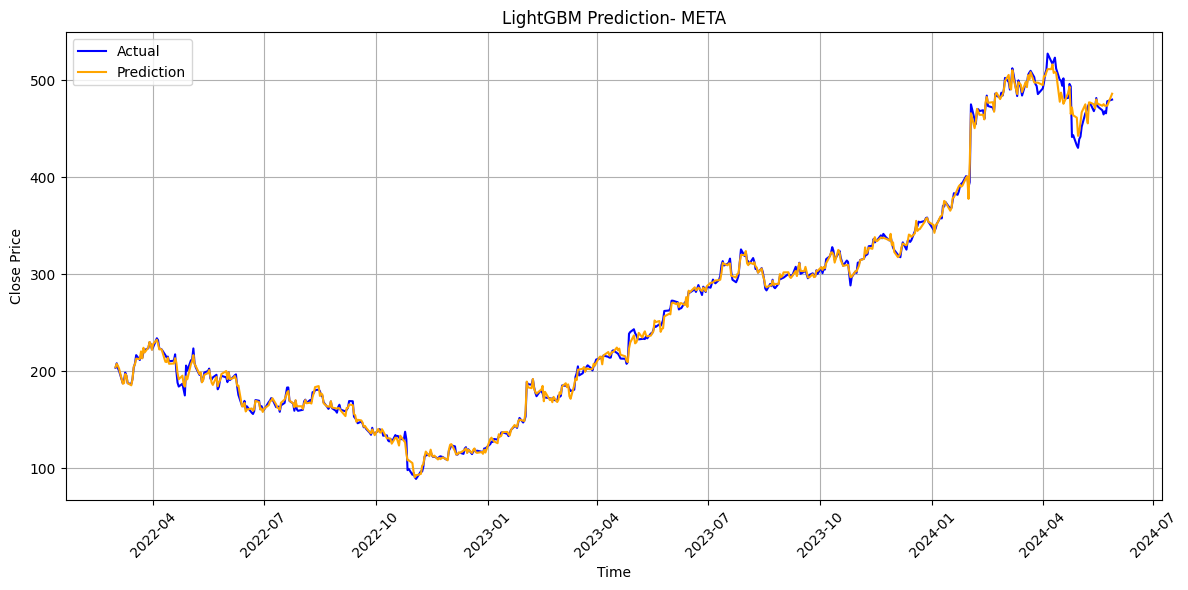

-----------------------------
Test
R2 Value Test:  -2.9089
MSE Test:       17327.2530
RMSE Test:      5.0397
MAE Test:       105.1269
MAPE:           0.1726
-----------------------------


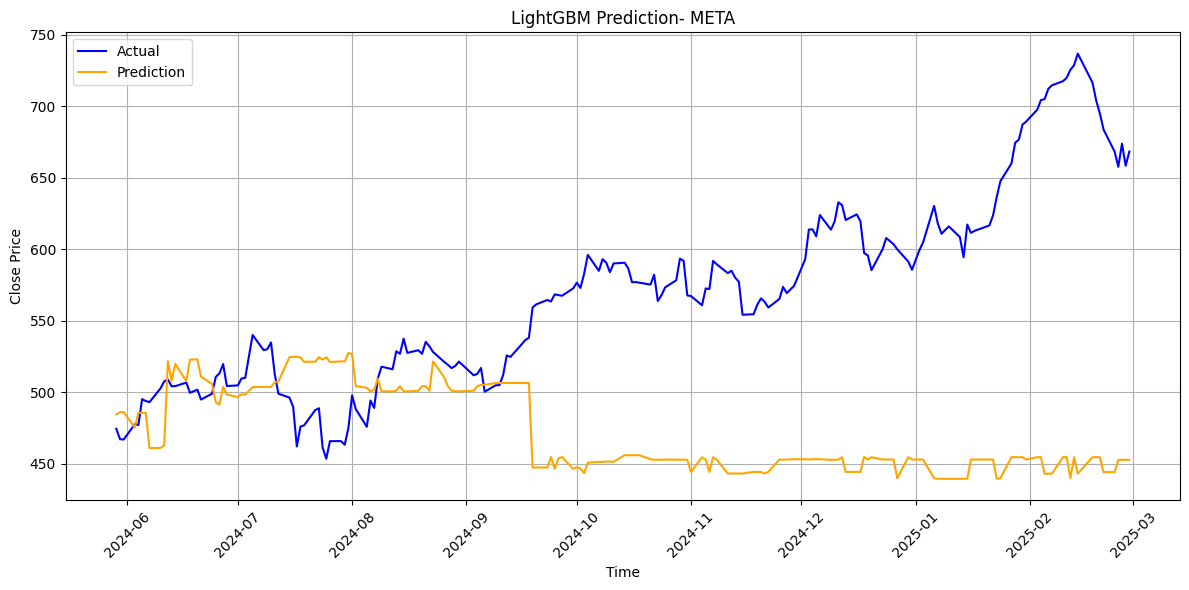

(LGBMRegressor(feature_fraction=0.7, learning_rate=0.2, max_bin=50, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  474.36  484.343848
 565 2024-05-30  467.05  485.993381
 566 2024-05-31  466.83  485.993381
 567 2024-06-03  477.49  475.231486
 568 2024-06-04  476.99  485.465594
 ..         ...     ...         ...
 748 2025-02-24  668.13  444.046253
 749 2025-02-25  657.50  452.582981
 750 2025-02-26  673.70  452.681812
 751 2025-02-27  658.24  452.582981
 752 2025-02-28  668.20  452.681812
 
 [189 rows x 3 columns])

In [83]:
model_lightgbm(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    feature_fraction=0.7,
    learning_rate=0.2,
    max_bin=50,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

-----------------------------
Train
R2 Value Train:  0.9974
MSE Train:       0.8404
RMSE Train:      0.9167
MAE Train:       0.7027
MAPE Train:      0.0043
-----------------------------


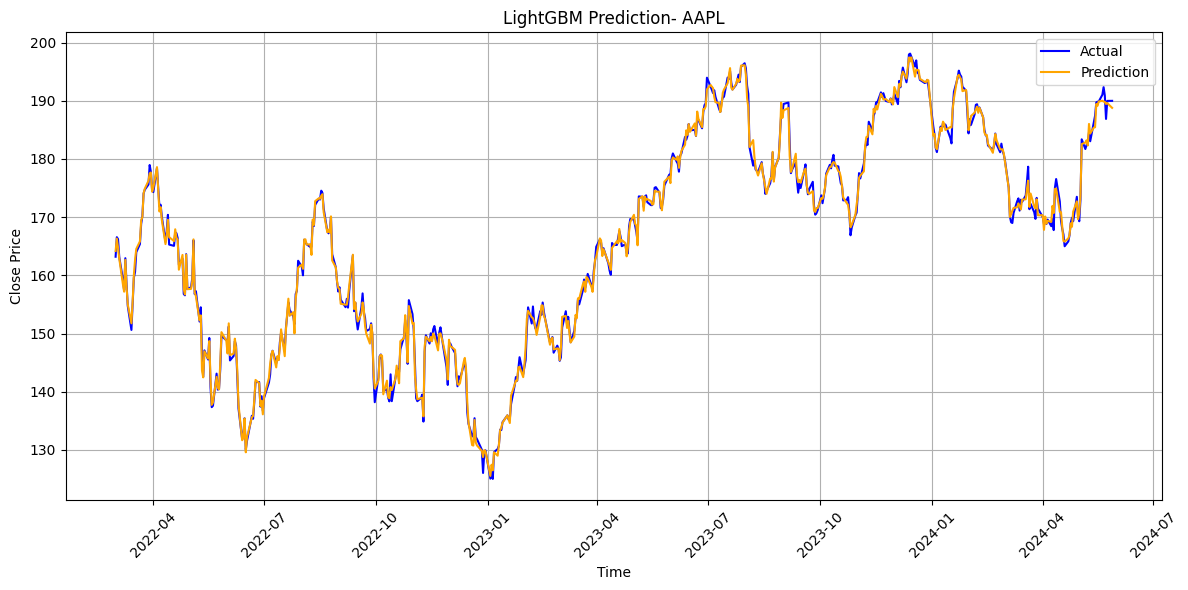

-----------------------------
Test
R2 Value Test:  -10.9463
MSE Test:       2124.4559
RMSE Test:      0.9167
MAE Test:       44.0094
MAPE:           0.1901
-----------------------------


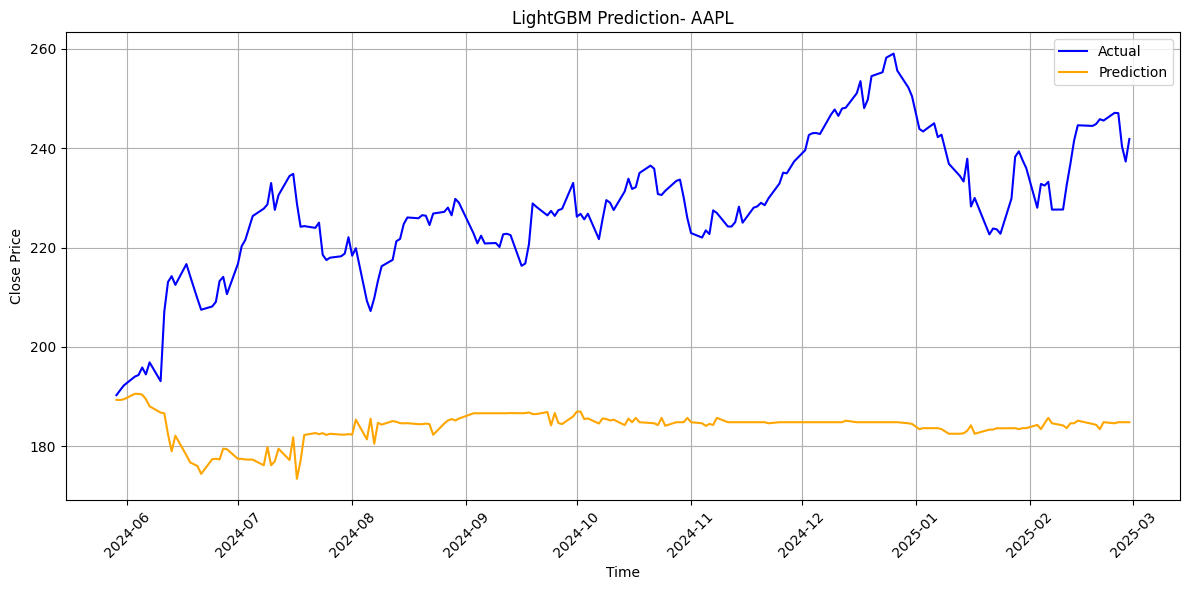

(LGBMRegressor(feature_fraction=0.9, learning_rate=0.2, max_bin=400, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  190.29  189.355103
 565 2024-05-30  191.29  189.329799
 566 2024-05-31  192.25  189.465277
 567 2024-06-03  194.03  190.571274
 568 2024-06-04  194.35  190.560187
 ..         ...     ...         ...
 748 2025-02-24  247.10  184.643424
 749 2025-02-25  247.04  184.857833
 750 2025-02-26  240.36  184.857833
 751 2025-02-27  237.30  184.857833
 752 2025-02-28  241.84  184.857833
 
 [189 rows x 3 columns])

In [84]:
model_lightgbm(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    feature_fraction=0.9,
    learning_rate=0.2,
    max_bin=400,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

-----------------------------
Train
R2 Value Train:  0.9987
MSE Train:       4.5375
RMSE Train:      2.1301
MAE Train:       1.6000
MAPE Train:      0.0052
-----------------------------


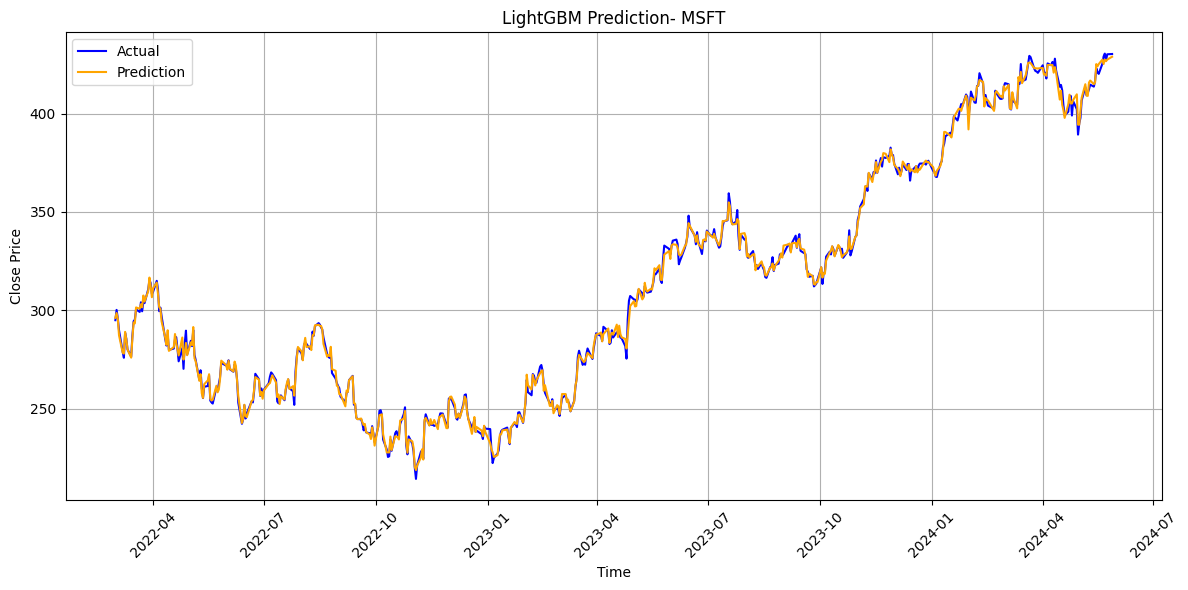

-----------------------------
Test
R2 Value Test:  -0.8844
MSE Test:       458.4018
RMSE Test:      2.1301
MAE Test:       17.5071
MAPE:           0.0403
-----------------------------


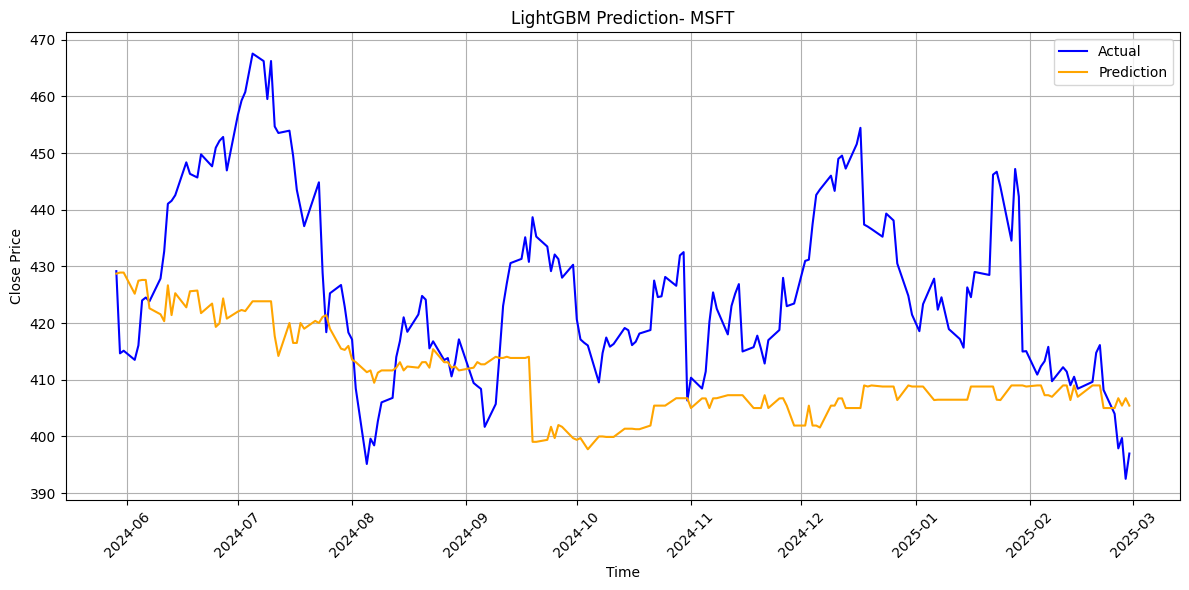

(LGBMRegressor(feature_fraction=0.9, learning_rate=0.2, max_bin=50, max_depth=3,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  429.17  428.730263
 565 2024-05-30  414.67  428.923377
 566 2024-05-31  415.13  428.923377
 567 2024-06-03  413.52  425.188999
 568 2024-06-04  416.07  427.489433
 ..         ...     ...         ...
 748 2025-02-24  404.00  405.017974
 749 2025-02-25  397.90  406.751911
 750 2025-02-26  399.73  405.443828
 751 2025-02-27  392.53  406.751911
 752 2025-02-28  396.99  405.443828
 
 [189 rows x 3 columns])

In [85]:
model_lightgbm(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    feature_fraction=0.9,
    learning_rate=0.2,
    max_bin=50,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

-----------------------------
Train
R2 Value Train:  0.9976
MSE Train:       1.3773
RMSE Train:      1.1736
MAE Train:       0.7752
MAPE Train:      0.0244
-----------------------------


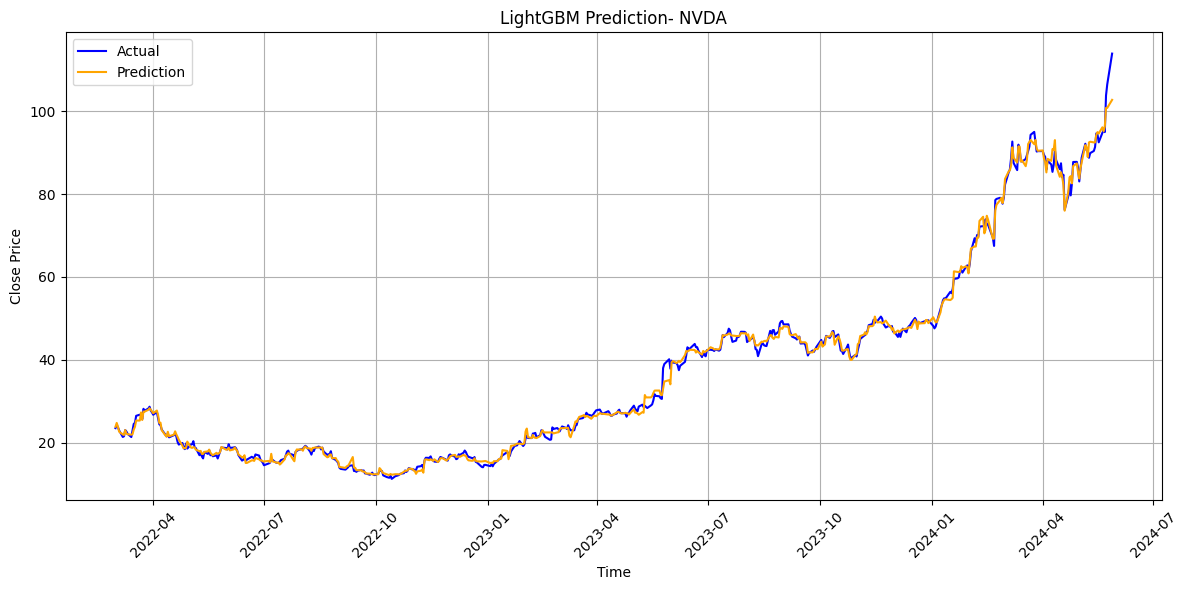

-----------------------------
Test
R2 Value Test:  -8.5039
MSE Test:       1274.7434
RMSE Test:      1.1736
MAE Test:       34.0039
MAPE:           0.2595
-----------------------------


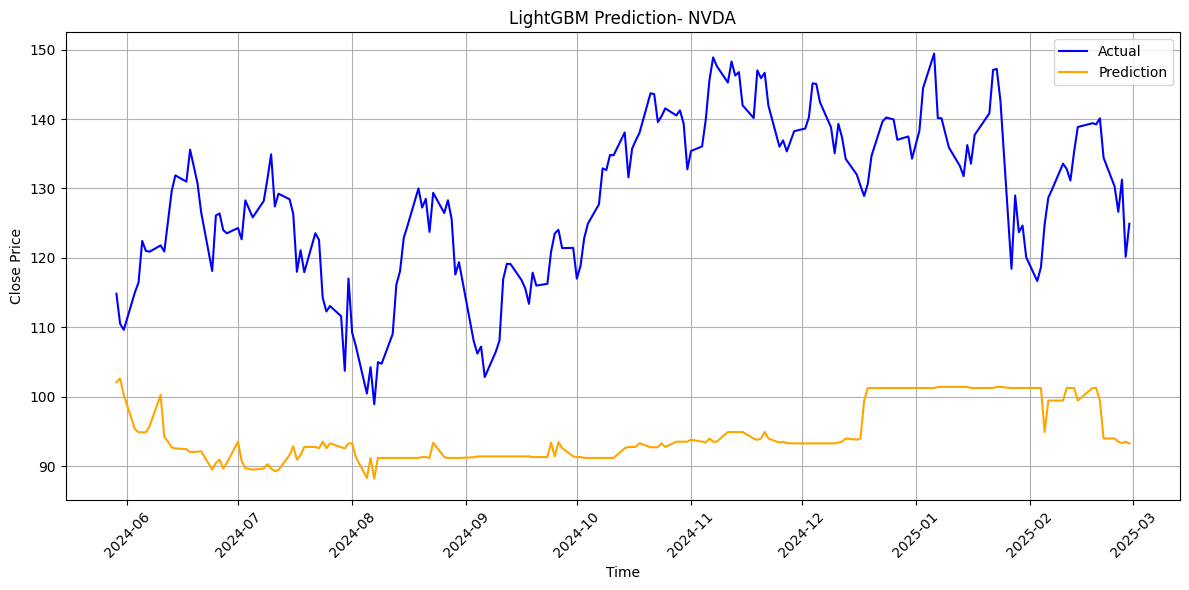

(LGBMRegressor(feature_fraction=0.8, max_bin=100, max_depth=3,
               min_data_in_leaf=25, n_estimators=200, random_state=42,
               verbosity=-1),
           date   actual  prediction
 564 2024-05-29  114.825  102.045268
 565 2024-05-30  110.500  102.601334
 566 2024-05-31  109.633  100.235152
 567 2024-06-03  115.000   95.326647
 568 2024-06-04  116.437   94.872698
 ..         ...      ...         ...
 748 2025-02-24  130.280   93.970025
 749 2025-02-25  126.630   93.507831
 750 2025-02-26  131.280   93.300537
 751 2025-02-27  120.150   93.507831
 752 2025-02-28  124.920   93.264696
 
 [189 rows x 3 columns])

In [86]:
model_lightgbm(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    feature_fraction=0.8,
    learning_rate=0.1,
    max_bin=100,
    max_depth=3,
    min_data_in_leaf=25,
    n_estimators=200,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

-----------------------------
Train
R2 Value Train:  0.9971
MSE Train:       1.2529
RMSE Train:      1.1193
MAE Train:       0.8202
MAPE Train:      0.0067
-----------------------------


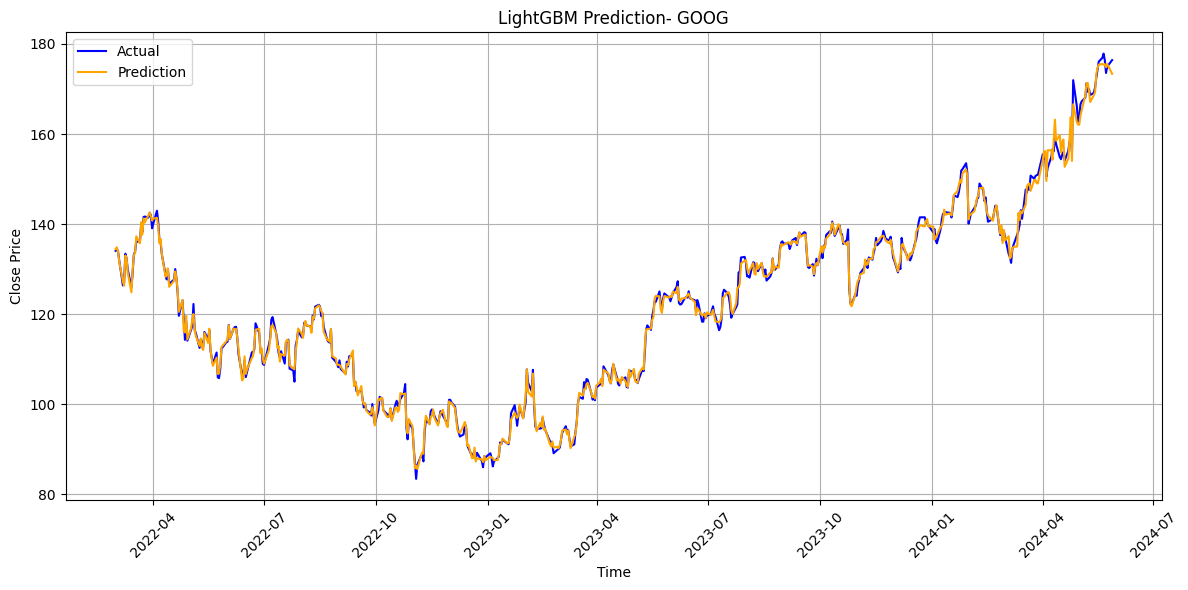

-----------------------------
Test
R2 Value Test:  -2.2936
MSE Test:       535.0999
RMSE Test:      1.1193
MAE Test:       19.3935
MAPE:           0.1061
-----------------------------


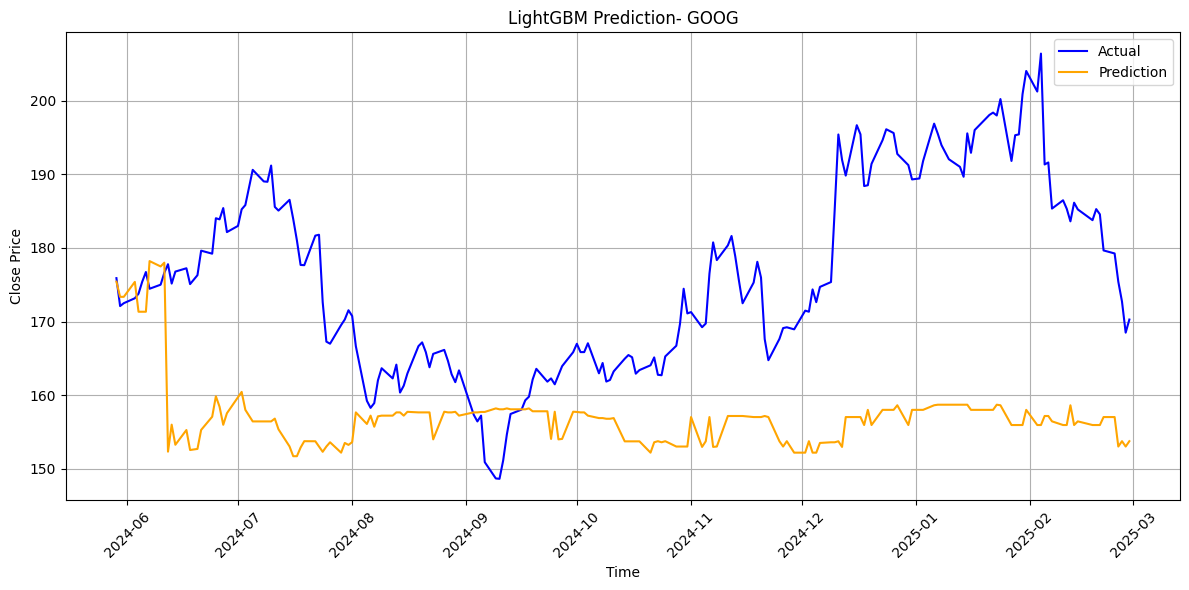

(LGBMRegressor(feature_fraction=0.6, learning_rate=0.2, max_bin=50, max_depth=5,
               min_data_in_leaf=25, n_estimators=600, random_state=42,
               verbosity=-1),
           date  actual  prediction
 564 2024-05-29  175.90  175.421569
 565 2024-05-30  172.11  173.362048
 566 2024-05-31  172.50  173.362048
 567 2024-06-03  173.17  175.391105
 568 2024-06-04  173.79  171.338765
 ..         ...     ...         ...
 748 2025-02-24  179.25  157.042502
 749 2025-02-25  175.42  153.041670
 750 2025-02-26  172.73  153.767725
 751 2025-02-27  168.50  153.041670
 752 2025-02-28  170.28  153.767725
 
 [189 rows x 3 columns])

In [87]:
model_lightgbm(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    feature_fraction=0.6,
    learning_rate=0.2,
    max_bin=50,
    max_depth=5,
    min_data_in_leaf=25,
    n_estimators=600,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#XGBoost

In [88]:
def model_XGBoost(X_train, y_train, X_test, y_test, learning_rate, max_depth,
                   alpha, reg_lambda, n_estimators, min_child_weight, colsample_bytree,
                   date_test, date_train, label_name='Dataset'):

    params = {
        'learning_rate': learning_rate,
        'max_depth': max_depth,
        'alpha': alpha,
        'reg_lambda' : reg_lambda,
        'n_estimators' : n_estimators,
        'min_child_weight' : min_child_weight,
        'colsample_bytree' : colsample_bytree,
    }
    model = XGBRegressor(**params)
    model.fit(X_train, y_train)


    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'XGBoost Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_XGB_{label_name}.csv'))
    return model, df_result

##META

-----------------------------
Train
R2 Value Train:  1.0000
MSE Train:       0.1478
RMSE Train:      0.3845
MAE Train:       0.3067
MAPE Train:      0.0014
-----------------------------


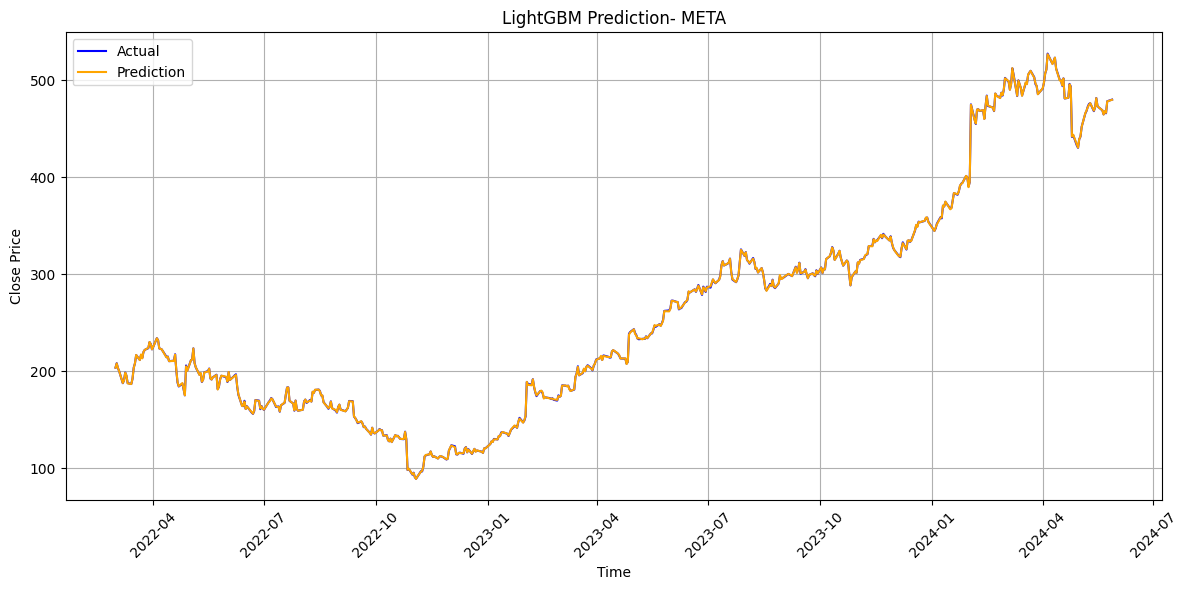

-----------------------------
Test
R2 Value Test:  -1.7465
MSE Test:       12174.4936
RMSE Test:      110.3381
MAE Test:       90.3737
MAPE:           0.1489
-----------------------------


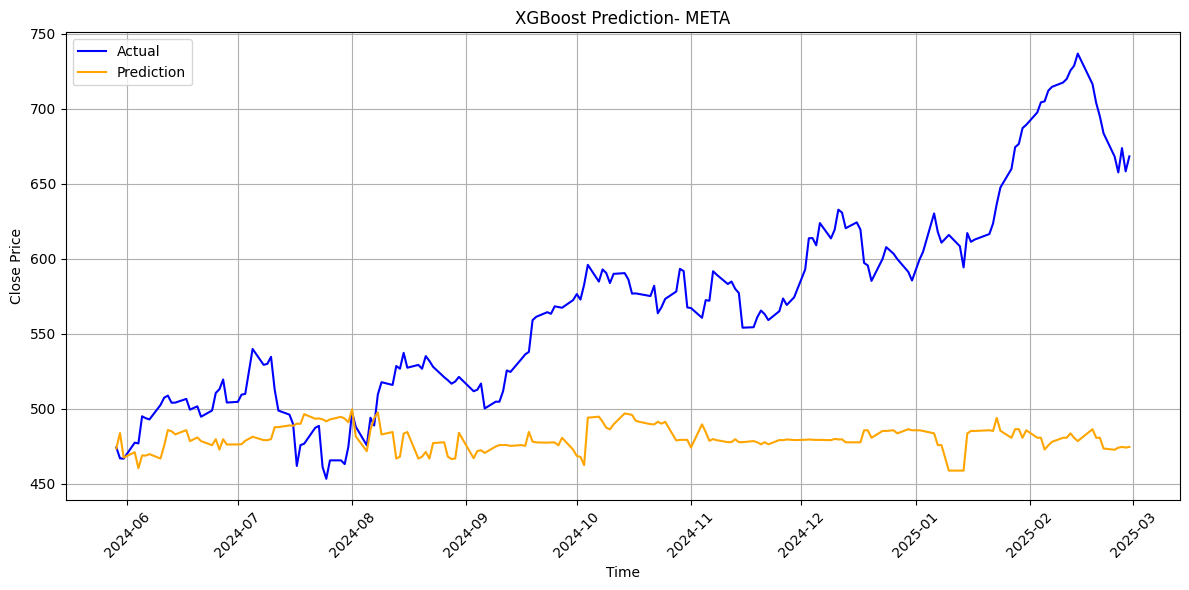

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  474.36  473.572784
 565 2024-05-30  467.05  483.931702
 566 2024-05-31  466.83  467.568573
 567 2024-06-03  477.49  471.101532
 568 2024-06-04  476.99  460.487274
 ..         ...     ...         ...
 748 202

In [89]:
model_XGBoost(Xtrain_META, ytrain_META, XTest_META, yTest_META,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_META['date'].iloc[train_size:],
    date_train=df_META['date'].iloc[:train_size],
    label_name='META')

##AAPL

-----------------------------
Train
R2 Value Train:  0.9995
MSE Train:       0.1503
RMSE Train:      0.3877
MAE Train:       0.2978
MAPE Train:      0.0018
-----------------------------


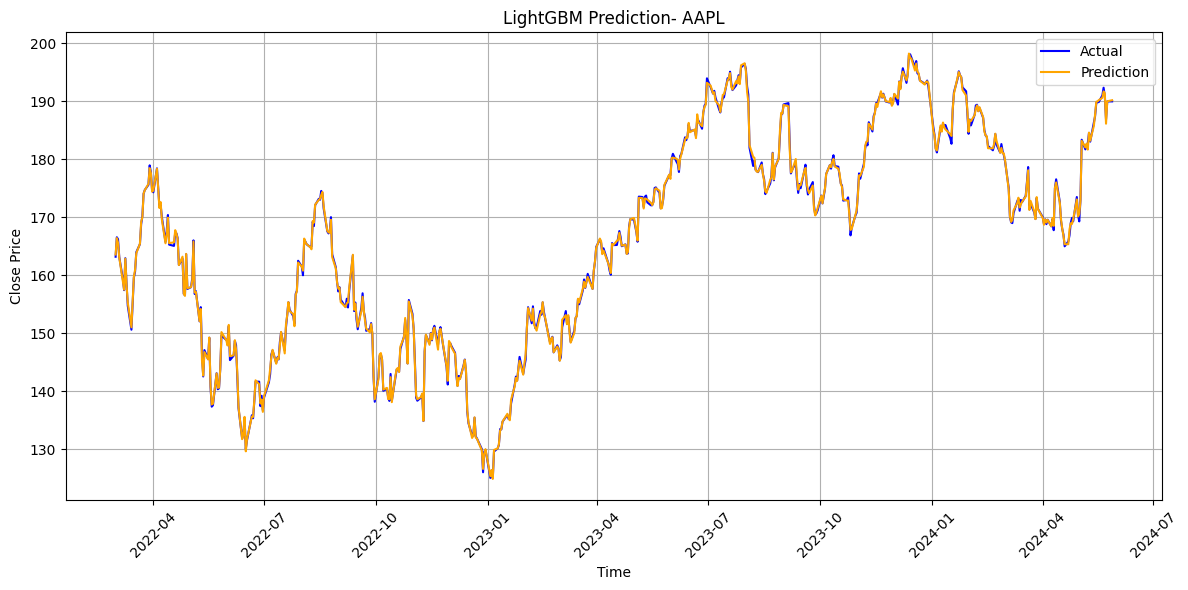

-----------------------------
Test
R2 Value Test:  -8.0171
MSE Test:       1603.5464
RMSE Test:      40.0443
MAE Test:       38.0534
MAPE:           0.1642
-----------------------------


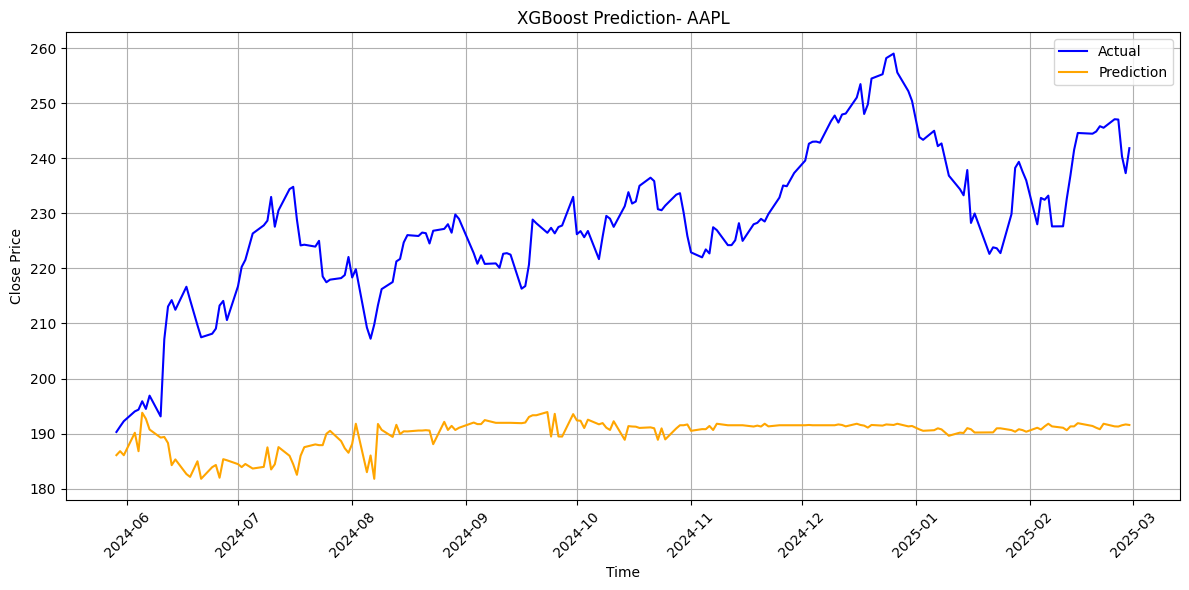

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  190.29  186.082321
 565 2024-05-30  191.29  186.806534
 566 2024-05-31  192.25  186.067932
 567 2024-06-03  194.03  190.149536
 568 2024-06-04  194.35  186.799637
 ..         ...     ...         ...
 748 202

In [90]:
model_XGBoost(Xtrain_AAPL, ytrain_AAPL, XTest_AAPL, yTest_AAPL,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 5,
    colsample_bytree = 0.7,
    date_test=df_AAPL['date'].iloc[train_size:],
    date_train=df_AAPL['date'].iloc[:train_size],
    label_name='AAPL')

##MSFT

-----------------------------
Train
R2 Value Train:  0.9997
MSE Train:       0.9005
RMSE Train:      0.9490
MAE Train:       0.7312
MAPE Train:      0.0024
-----------------------------


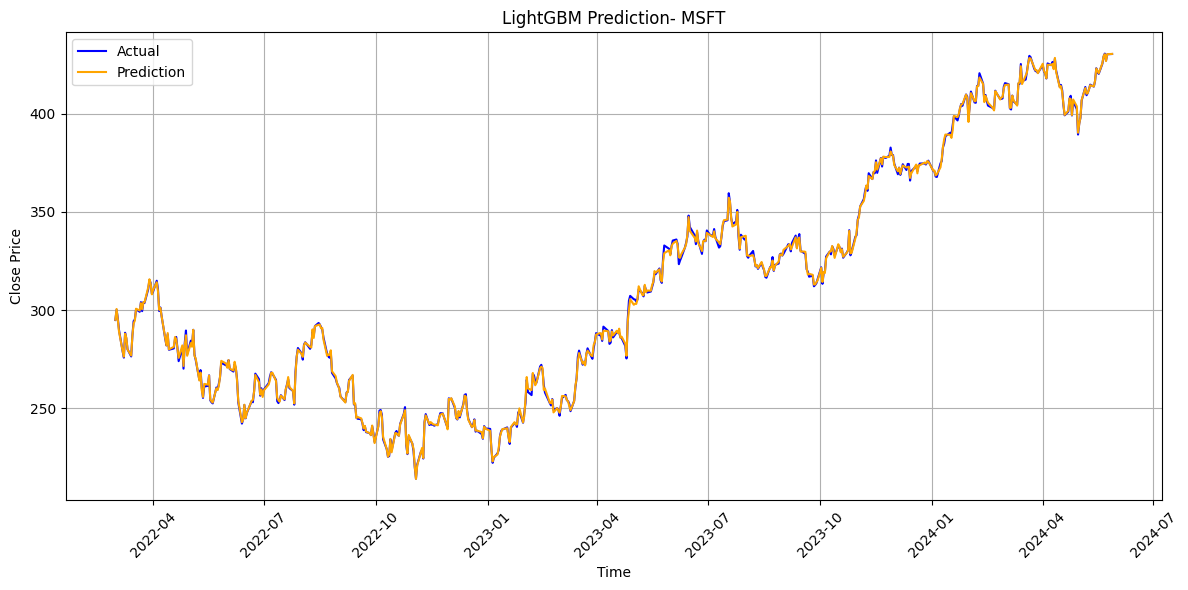

-----------------------------
Test
R2 Value Test:  -0.7497
MSE Test:       425.6293
RMSE Test:      20.6308
MAE Test:       16.7222
MAPE:           0.0385
-----------------------------


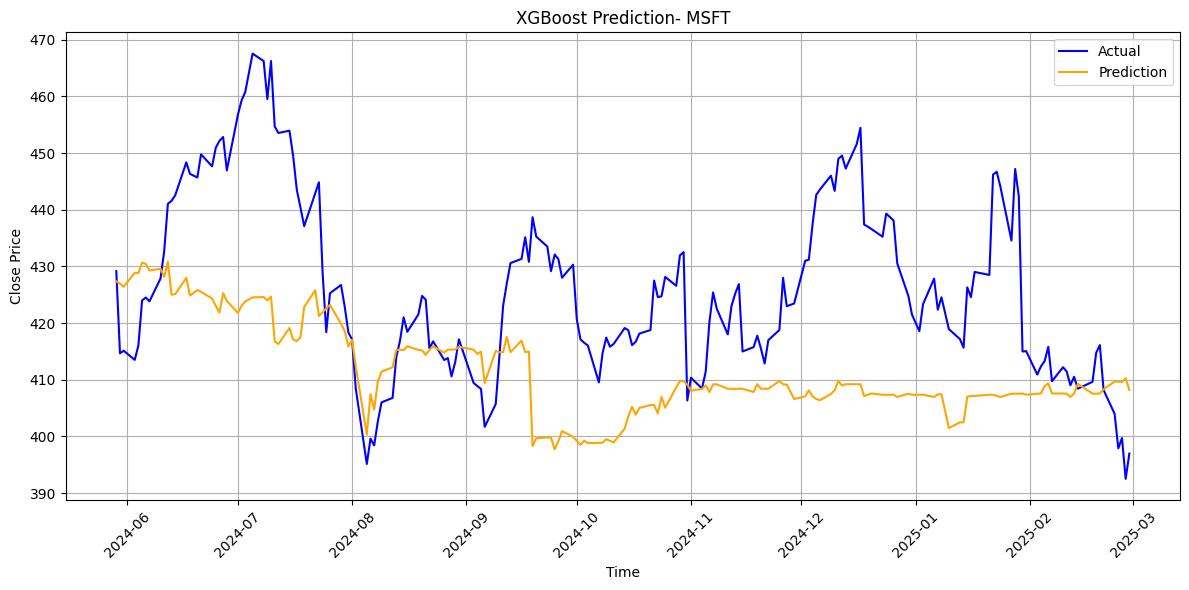

(XGBRegressor(alpha=0.1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  429.17  427.389404
 565 2024-05-30  414.67  426.958923
 566 2024-05-31  415.13  426.410614
 567 2024-06-03  413.52  428.868103
 568 2024-06-04  416.07  428.848450
 ..         ...     ...         ...
 748 2

In [91]:
model_XGBoost(Xtrain_MSFT, ytrain_MSFT, XTest_MSFT, yTest_MSFT,
    learning_rate = 0.1,
    max_depth = 3,
    alpha = 0.1,
    reg_lambda = 0.1,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.7,
    date_test=df_MSFT['date'].iloc[train_size:],
    date_train=df_MSFT['date'].iloc[:train_size],
    label_name='MSFT')

##NVDA

-----------------------------
Train
R2 Value Train:  0.9995
MSE Train:       0.2973
RMSE Train:      0.5452
MAE Train:       0.4240
MAPE Train:      0.0149
-----------------------------


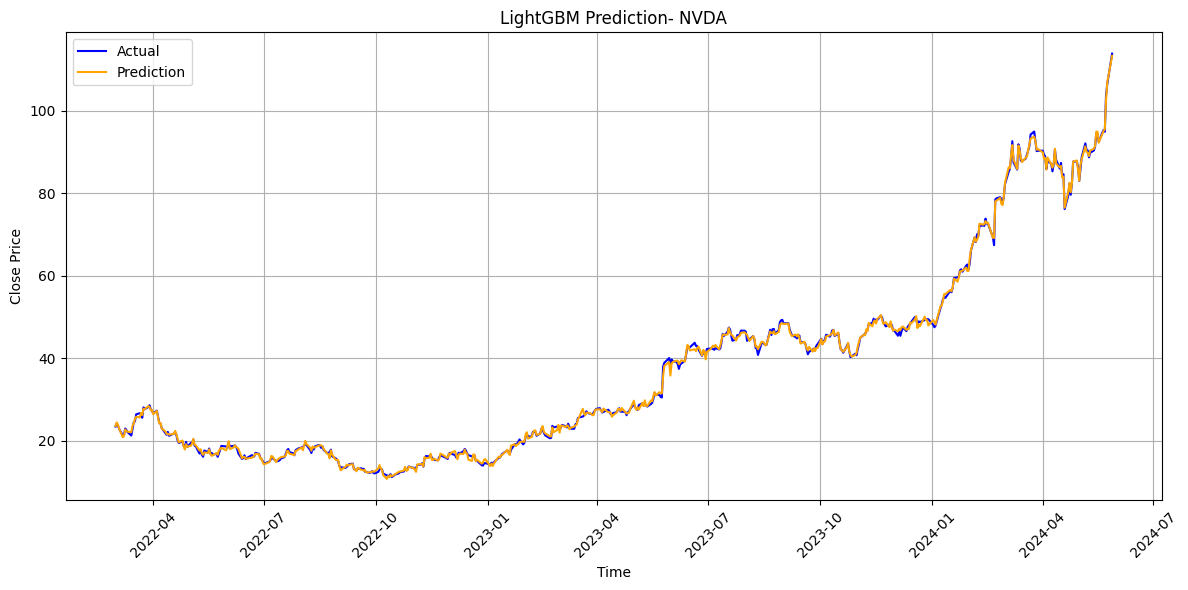

-----------------------------
Test
R2 Value Test:  -10.9229
MSE Test:       1599.2054
RMSE Test:      39.9901
MAE Test:       38.2640
MAPE:           0.2922
-----------------------------


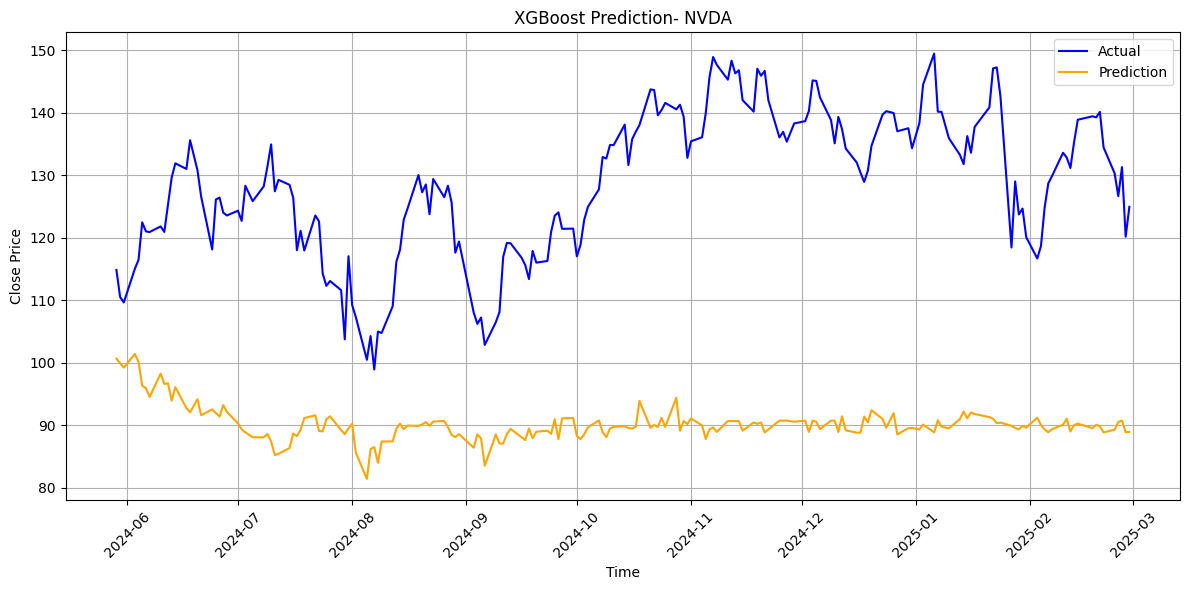

(XGBRegressor(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.1, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, ...),
           date   actual  prediction
 564 2024-05-29  114.825  100.632889
 565 2024-05-30  110.500   99.934303
 566 2024-05-31  109.633   99.206726
 567 2024-06-03  115.000  101.384651
 568 2024-06-04  116.437  100.131638
 ..         ...      ...         ...
 

In [92]:
model_XGBoost(Xtrain_NVDA, ytrain_NVDA, XTest_NVDA, yTest_NVDA,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 0,
    reg_lambda = 0,
    n_estimators = 600,
    min_child_weight = 1,
    colsample_bytree = 0.1,
    date_test=df_NVDA['date'].iloc[train_size:],
    date_train=df_NVDA['date'].iloc[:train_size],
    label_name='NVDA')

##GOOG

-----------------------------
Train
R2 Value Train:  0.9979
MSE Train:       0.9113
RMSE Train:      0.9546
MAE Train:       0.7365
MAPE Train:      0.0062
-----------------------------


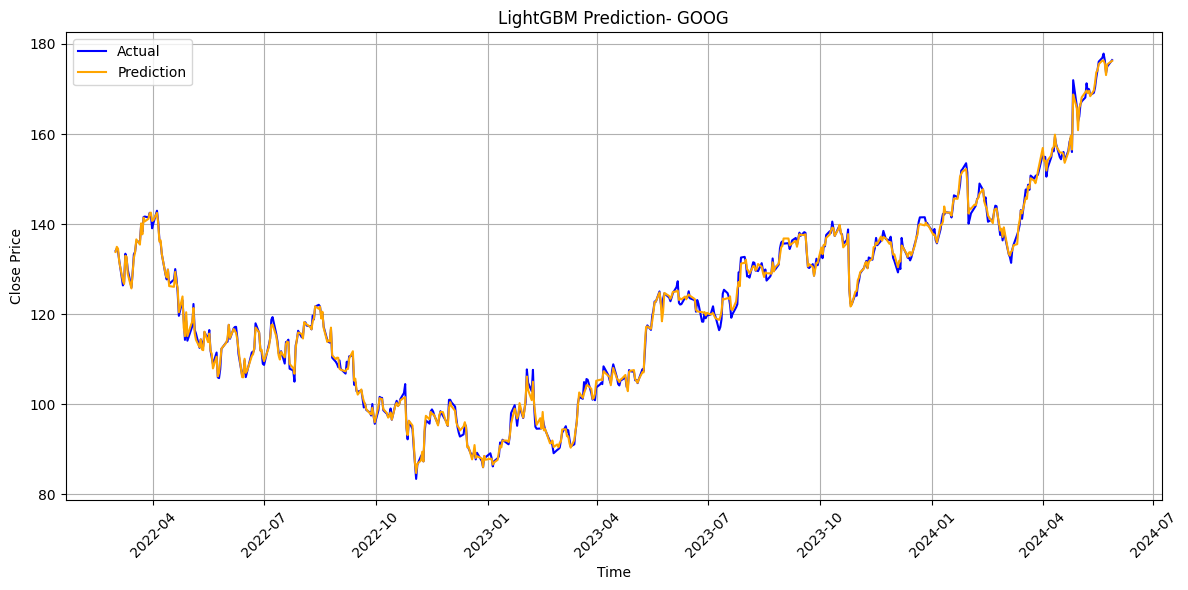

-----------------------------
Test
R2 Value Test:  -0.1928
MSE Test:       193.7953
RMSE Test:      13.9210
MAE Test:       10.7818
MAPE:           0.0591
-----------------------------


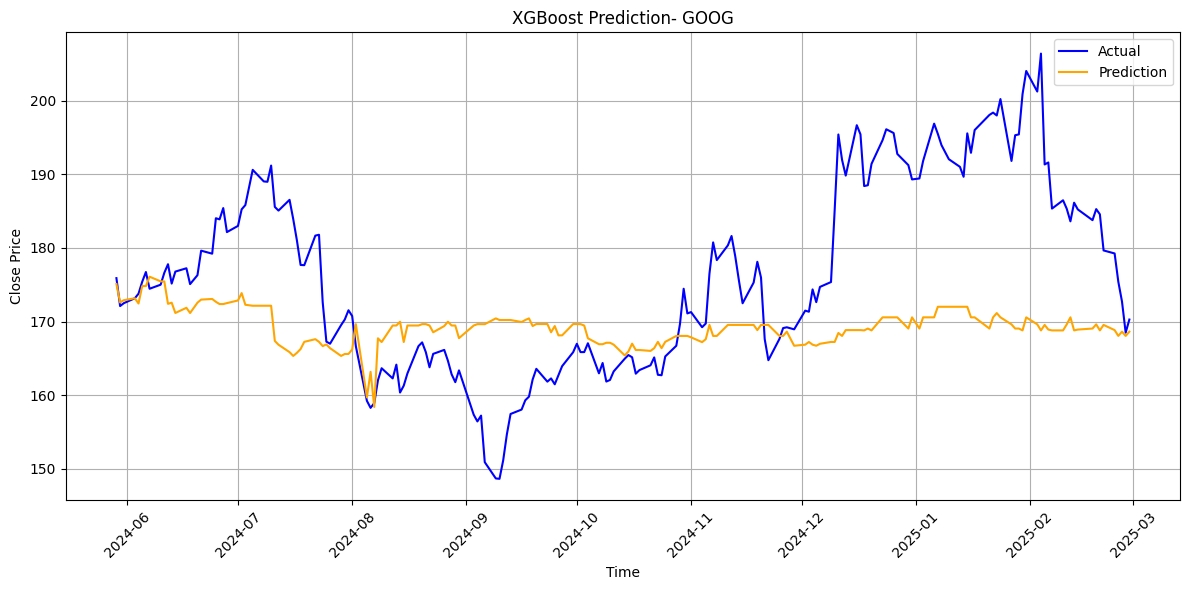

(XGBRegressor(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...),
           date  actual  prediction
 564 2024-05-29  175.90  175.106827
 565 2024-05-30  172.11  172.601669
 566 2024-05-31  172.50  172.903931
 567 2024-06-03  173.17  173.167114
 568 2024-06-04  173.79  172.456161
 ..         ...     ...         ...
 748 202

In [93]:
model_XGBoost(Xtrain_GOOG, ytrain_GOOG, XTest_GOOG, yTest_GOOG,
    learning_rate = 0.2,
    max_depth = 3,
    alpha = 1,
    reg_lambda = 0.1,
    n_estimators = 200,
    min_child_weight = 5,
    colsample_bytree = 0.7,
    date_test=df_GOOG['date'].iloc[train_size:],
    date_train=df_GOOG['date'].iloc[:train_size],
    label_name='GOOG')

#RNN

In [94]:
look_back = 10

Xtrain_META1, ytrain_META1, = [], []
for i in range(len(Xtrain_META) - look_back):
    Xtrain_META1.append(Xtrain_META[i:i + look_back])
    ytrain_META1.append(ytrain_META[i + look_back])

Xtrain_META1, ytrain_META1 = np.array(Xtrain_META1), np.array(ytrain_META1)

In [95]:
print(Xtrain_META1.shape)
print(ytrain_META1.shape)

(554, 10, 10)
(554,)


In [96]:
XTest_META1, yTest_META1, = [], []
for i in range(len(XTest_META) - look_back):
    XTest_META1.append(XTest_META[i:i + look_back])
    yTest_META1.append(yTest_META.iloc[i + look_back])

XTest_META1, yTest_META1 = np.array(XTest_META1), np.array(yTest_META1)

In [97]:
print(XTest_META1.shape)
print(yTest_META1.shape)

(179, 10, 10)
(179,)


In [98]:
Xtrain_AAPL1, ytrain_AAPL1 = [], []
for i in range(len(Xtrain_AAPL) - look_back):
    Xtrain_AAPL1.append(Xtrain_AAPL[i:i + look_back])
    ytrain_AAPL1.append(ytrain_AAPL[i + look_back])

Xtrain_AAPL1, ytrain_AAPL1 = np.array(Xtrain_AAPL1), np.array(ytrain_AAPL1)

In [99]:
XTest_AAPL1, yTest_AAPL1, = [], []
for i in range(len(XTest_AAPL) - look_back):
    XTest_AAPL1.append(XTest_AAPL[i:i + look_back])
    yTest_AAPL1.append(yTest_AAPL.iloc[i + look_back])

XTest_AAPL1, yTest_AAPL1 = np.array(XTest_AAPL1), np.array(yTest_AAPL1)

In [100]:
print(Xtrain_AAPL1.shape)
print(ytrain_AAPL1.shape)
print(XTest_AAPL1.shape)
print(yTest_AAPL1.shape)

(554, 10, 9)
(554,)
(179, 10, 9)
(179,)


In [101]:
Xtrain_MSFT1, ytrain_MSFT1 = [], []
for i in range(len(Xtrain_MSFT) - look_back):
    Xtrain_MSFT1.append(Xtrain_MSFT[i:i + look_back])
    ytrain_MSFT1.append(ytrain_MSFT[i + look_back])

Xtrain_MSFT1, ytrain_MSFT1 = np.array(Xtrain_MSFT1), np.array(ytrain_MSFT1)

In [102]:
XTest_MSFT1, yTest_MSFT1, = [], []
for i in range(len(XTest_MSFT) - look_back):
    XTest_MSFT1.append(XTest_MSFT[i:i + look_back])
    yTest_MSFT1.append(yTest_MSFT.iloc[i + look_back])

XTest_MSFT1, yTest_MSFT1 = np.array(XTest_MSFT1), np.array(yTest_MSFT1)

In [103]:
print(Xtrain_MSFT1.shape)
print(ytrain_MSFT1.shape)
print(XTest_MSFT1.shape)
print(yTest_MSFT1.shape)

(554, 10, 10)
(554,)
(179, 10, 10)
(179,)


In [104]:
Xtrain_NVDA1, ytrain_NVDA1 = [], []
for i in range(len(Xtrain_NVDA) - look_back):
    Xtrain_NVDA1.append(Xtrain_NVDA[i:i + look_back])
    ytrain_NVDA1.append(ytrain_NVDA[i + look_back])

Xtrain_NVDA1, ytrain_NVDA1 = np.array(Xtrain_NVDA1), np.array(ytrain_NVDA1)

In [105]:
XTest_NVDA1, yTest_NVDA1, = [], []
for i in range(len(XTest_NVDA) - look_back):
    XTest_NVDA1.append(XTest_NVDA[i:i + look_back])
    yTest_NVDA1.append(yTest_NVDA.iloc[i + look_back])

XTest_NVDA1, yTest_NVDA1 = np.array(XTest_NVDA1), np.array(yTest_NVDA1)

In [106]:
print(Xtrain_NVDA1.shape)
print(ytrain_NVDA1.shape)
print(XTest_NVDA1.shape)
print(yTest_NVDA1.shape)

(554, 10, 10)
(554,)
(179, 10, 10)
(179,)


In [107]:
Xtrain_GOOG1, ytrain_GOOG1 = [], []
for i in range(len(Xtrain_GOOG) - look_back):
    Xtrain_GOOG1.append(Xtrain_GOOG[i:i + look_back])
    ytrain_GOOG1.append(ytrain_GOOG[i + look_back])

Xtrain_GOOG1, ytrain_GOOG1 = np.array(Xtrain_GOOG1), np.array(ytrain_GOOG1)

In [108]:
XTest_GOOG1, yTest_GOOG1, = [], []
for i in range(len(XTest_GOOG) - look_back):
    XTest_GOOG1.append(XTest_GOOG[i:i + look_back])
    yTest_GOOG1.append(yTest_GOOG.iloc[i + look_back])

XTest_GOOG1, yTest_GOOG1 = np.array(XTest_GOOG1), np.array(yTest_GOOG1)

In [109]:
print(Xtrain_GOOG1.shape)
print(ytrain_GOOG1.shape)
print(XTest_GOOG1.shape)
print(yTest_GOOG1.shape)

(554, 10, 9)
(554,)
(179, 10, 9)
(179,)


In [110]:
def model_RNN(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(SimpleRNN(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

    # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'RNN Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_RNN_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9833
MSE Train:       227.9206
RMSE Train:      15.0970
MAE Train:       11.2523
MAPE Train:      0.0465
-----------------------------


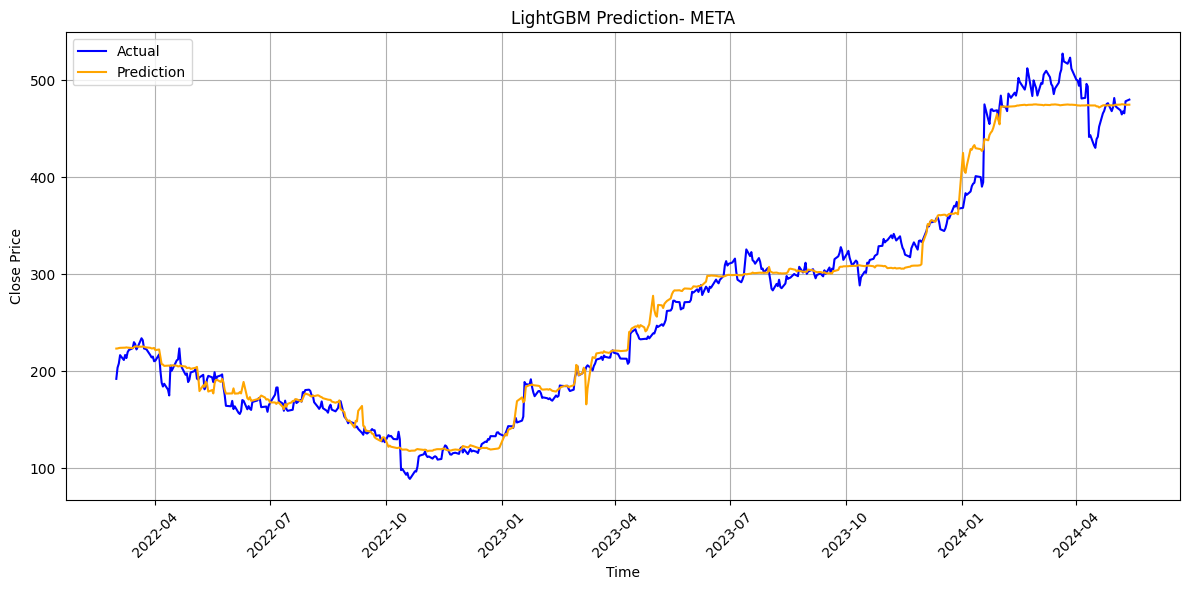

-----------------------------
Test
R2 Value Test:  -2.1520
MSE Test:       13454.1352
RMSE Test:      115.9920
MAE Test:       97.4486
MAPE:           0.1603
-----------------------------


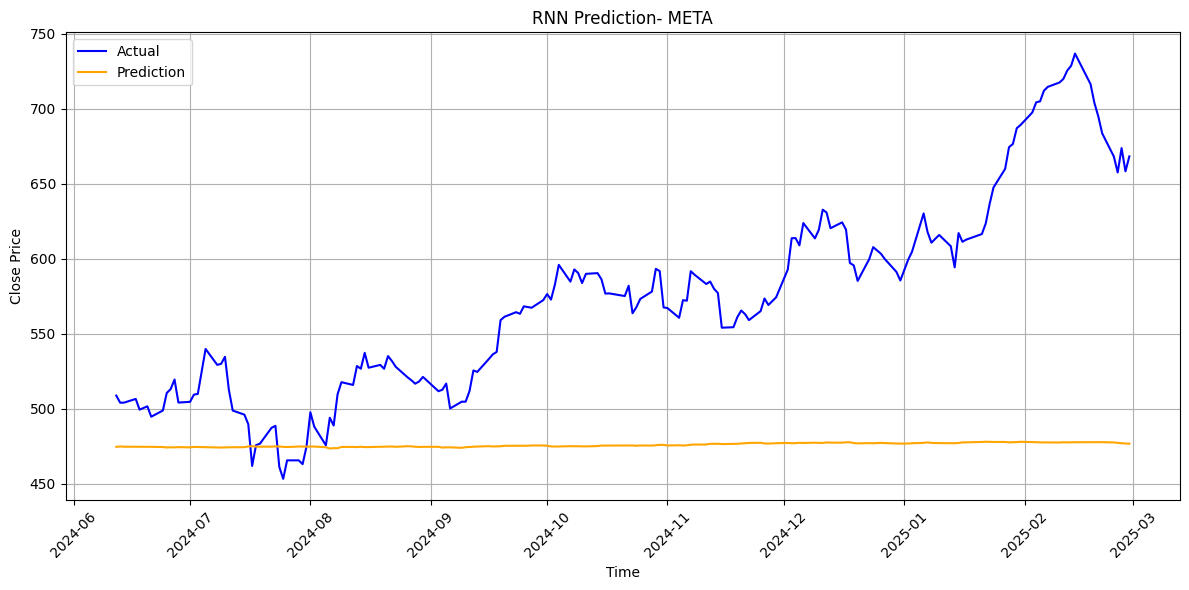

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a47af9c900>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  508.84  474.703156
 575 2024-06-13  504.10  474.938324
 576 2024-06-14  504.16  474.792328
 577 2024-06-17  506.63  474.777191
 578 2024-06-18  499.49  474.808746
 ..         ...     ...         ...
 748 2025-02-24  668.13  477.640289
 749 2025-02-25  657.50  477.347321
 750 2025-02-26  673.70  477.112640
 751 2025-02-27  658.24  476.918091
 752 2025-02-28  668.20  476.820221
 
 [179 rows x 3 columns])

In [111]:
model_RNN(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'RMSprop',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.7635
MSE Train:       78.5126
RMSE Train:      8.8607
MAE Train:       7.1498
MAPE Train:      0.0433
-----------------------------


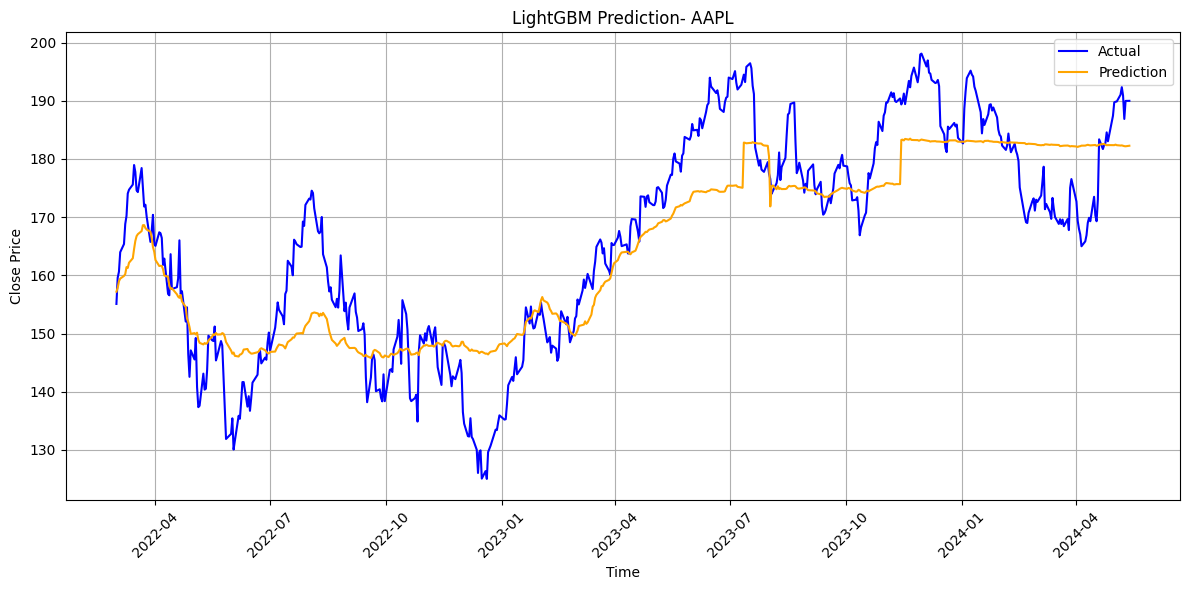

-----------------------------
Test
R2 Value Test:  -19.8860
MSE Test:       2554.4218
RMSE Test:      50.5413
MAE Test:       49.1013
MAPE:           0.2117
-----------------------------


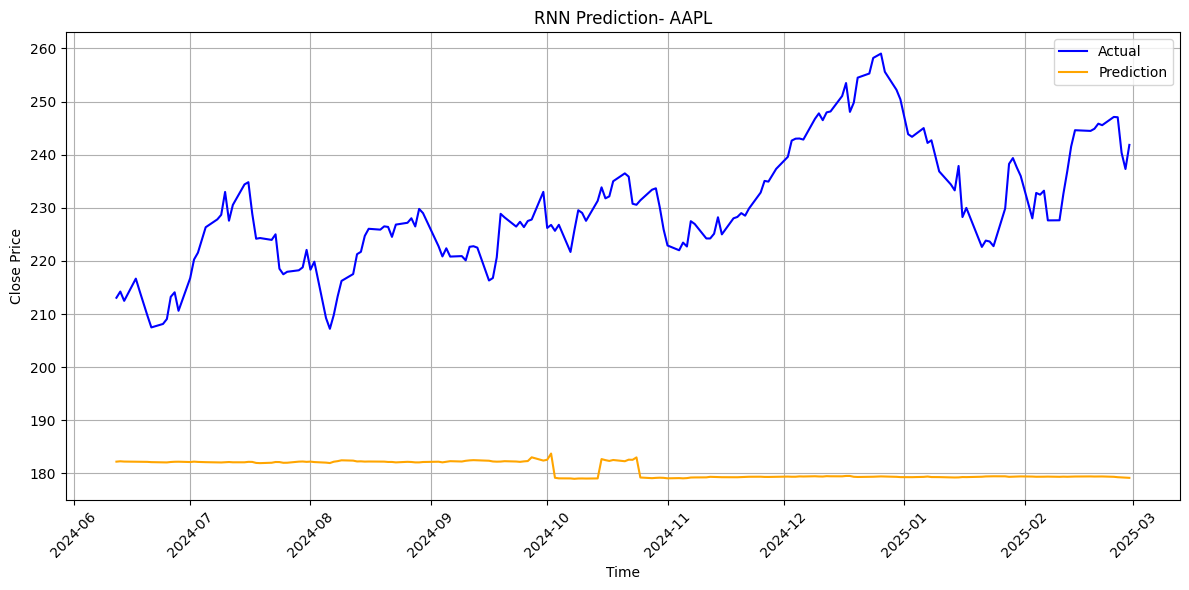

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a49210ea20>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  213.07  182.229111
 575 2024-06-13  214.24  182.296051
 576 2024-06-14  212.49  182.244125
 577 2024-06-17  216.67  182.213257
 578 2024-06-18  214.29  182.217194
 ..         ...     ...         ...
 748 2025-02-24  247.10  179.376770
 749 2025-02-25  247.04  179.301392
 750 2025-02-26  240.36  179.262543
 751 2025-02-27  237.30  179.238586
 752 2025-02-28  241.84  179.180771
 
 [179 rows x 3 columns])

In [112]:
model_RNN(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9779
MSE Train:       80.5612
RMSE Train:      8.9756
MAE Train:       7.0349
MAPE Train:      0.0229
-----------------------------


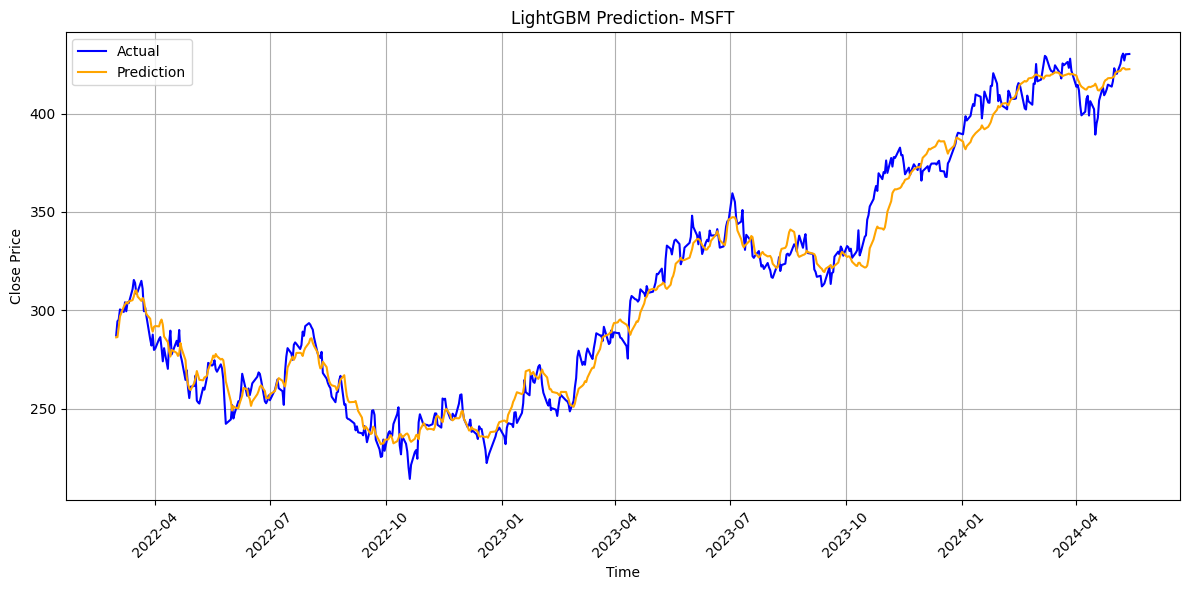

-----------------------------
Test
R2 Value Test:  -0.0843
MSE Test:       274.9765
RMSE Test:      16.5824
MAE Test:       13.7874
MAPE:           0.0323
-----------------------------


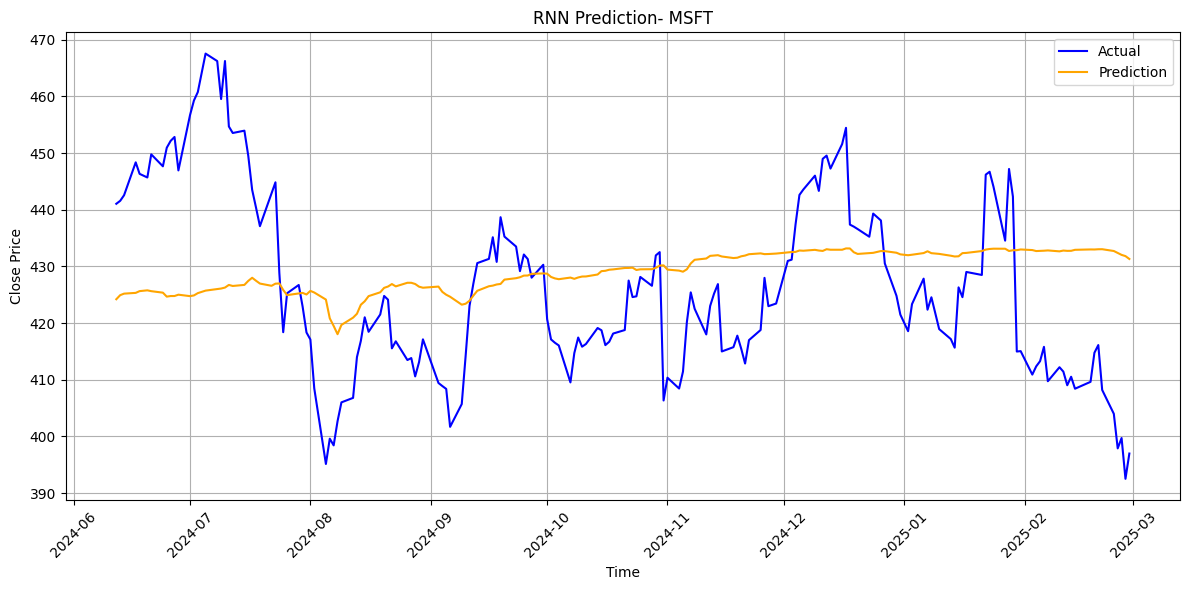

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a49115ade0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  441.06  424.214966
 575 2024-06-13  441.58  424.936829
 576 2024-06-14  442.57  425.204071
 577 2024-06-17  448.37  425.339111
 578 2024-06-18  446.34  425.647858
 ..         ...     ...         ...
 748 2025-02-24  404.00  432.727600
 749 2025-02-25  397.90  432.386200
 750 2025-02-26  399.73  432.042572
 751 2025-02-27  392.53  431.826324
 752 2025-02-28  396.99  431.323273
 
 [179 rows x 3 columns])

In [113]:
model_RNN(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Nadam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9854
MSE Train:       8.3145
RMSE Train:      2.8835
MAE Train:       2.1621
MAPE Train:      0.0736
-----------------------------


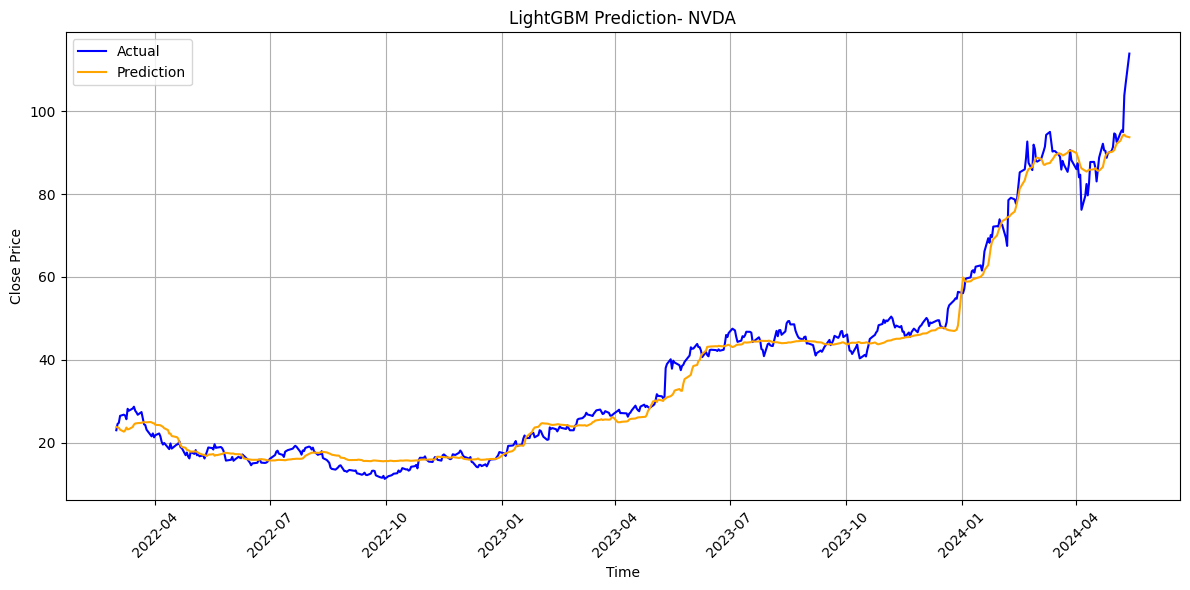

-----------------------------
Test
R2 Value Test:  -6.3664
MSE Test:       981.3951
RMSE Test:      31.3272
MAE Test:       29.6282
MAPE:           0.2241
-----------------------------


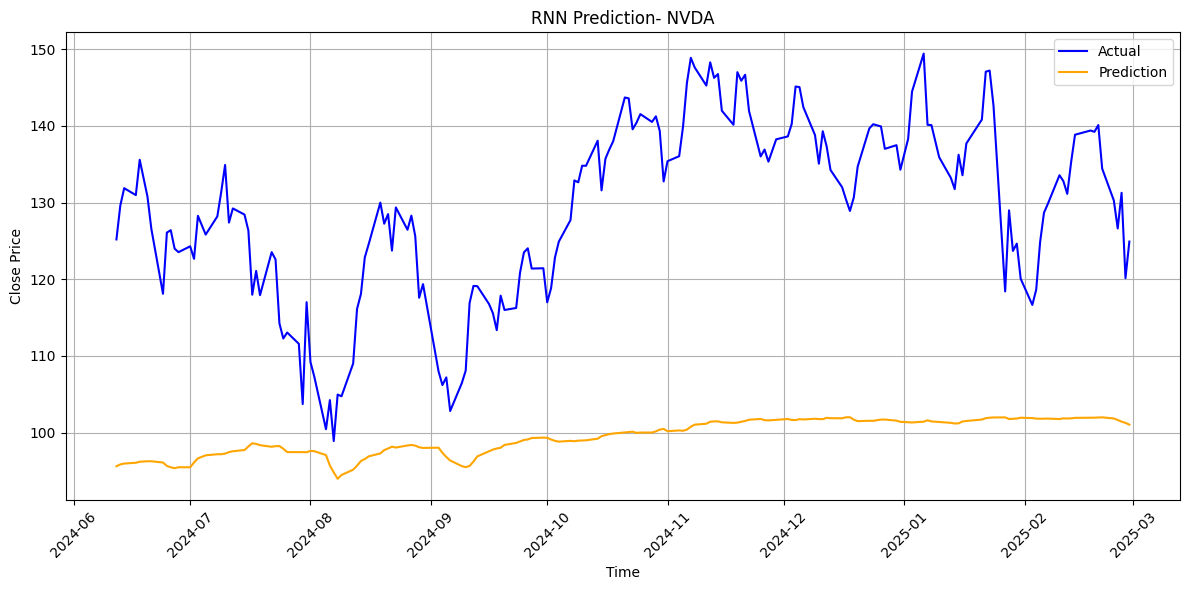

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a479c2f420>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  125.20   95.622963
 575 2024-06-13  129.61   95.862480
 576 2024-06-14  131.88   95.972565
 577 2024-06-17  130.98   96.078529
 578 2024-06-18  135.58   96.210434
 ..         ...     ...         ...
 748 2025-02-24  130.28  101.852562
 749 2025-02-25  126.63  101.658035
 750 2025-02-26  131.28  101.438293
 751 2025-02-27  120.15  101.277695
 752 2025-02-28  124.92  101.047180
 
 [179 rows x 3 columns])

In [114]:
model_RNN(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'Adam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9790
MSE Train:       9.0711
RMSE Train:      3.0118
MAE Train:       2.3077
MAPE Train:      0.0193
-----------------------------


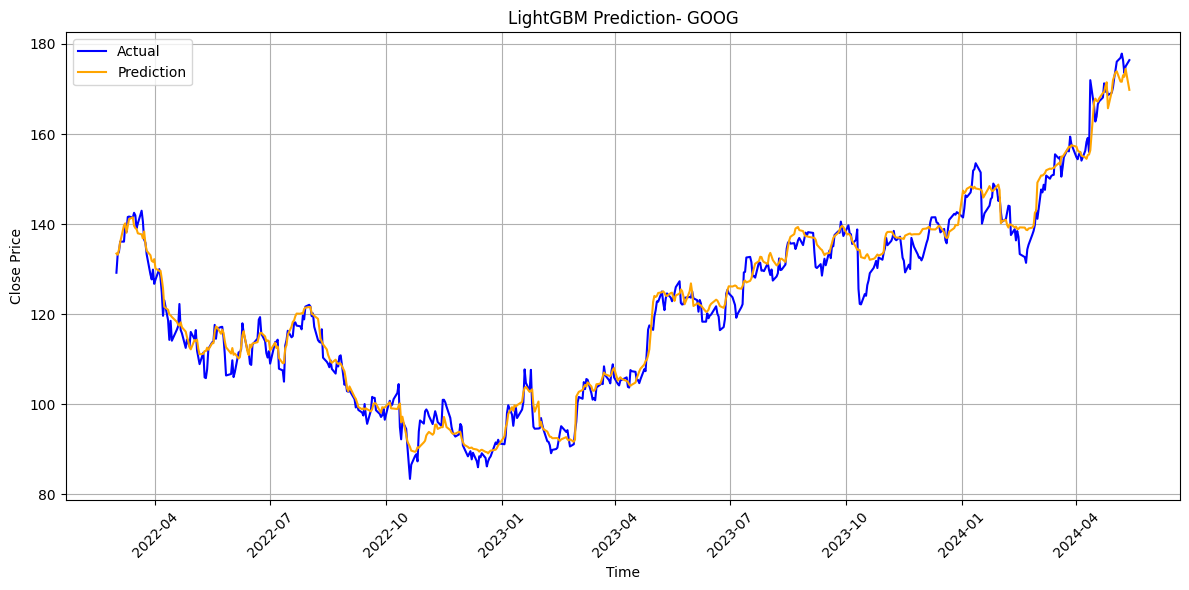

-----------------------------
Test
R2 Value Test:  -0.0391
MSE Test:       178.0104
RMSE Test:      13.3421
MAE Test:       11.9235
MAPE:           0.0689
-----------------------------


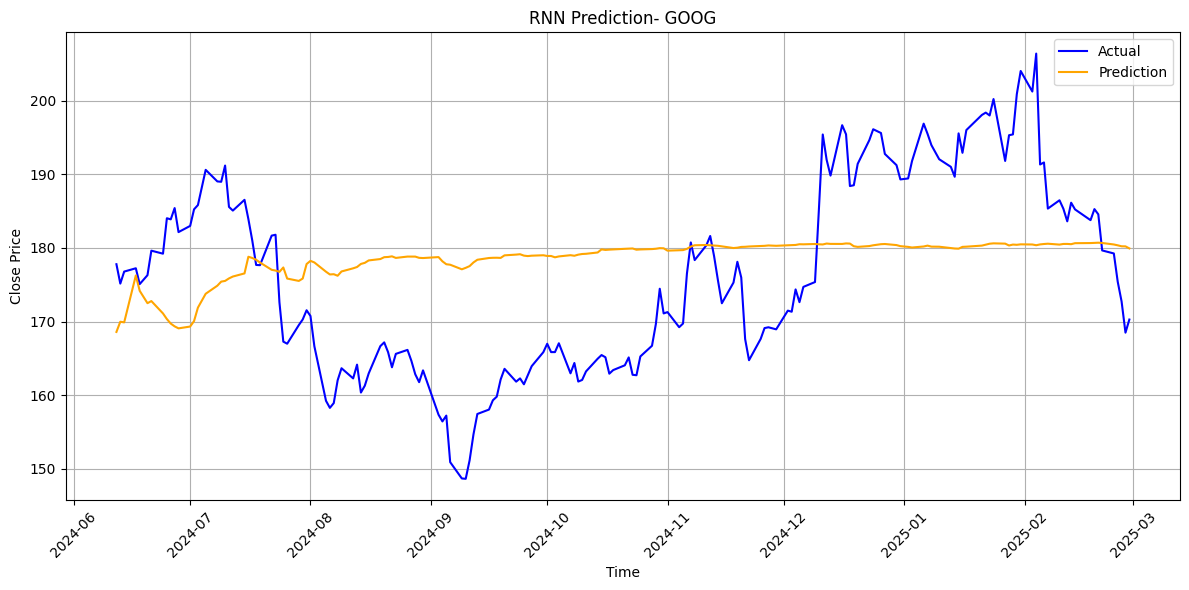

(KerasRegressor(
 	model=<function model_RNN.<locals>.create_model at 0x79a4812d3d80>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  177.79  168.596100
 575 2024-06-13  175.16  169.984528
 576 2024-06-14  176.79  169.898087
 577 2024-06-17  177.24  176.263824
 578 2024-06-18  175.09  174.178467
 ..         ...     ...         ...
 748 2025-02-24  179.25  180.468750
 749 2025-02-25  175.42  180.355225
 750 2025-02-26  172.73  180.222763
 751 2025-02-27  168.50  180.211700
 752 2025-02-28  170.28  179.937744
 
 [179 rows x 3 columns])

In [116]:
model_RNN(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Nadam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#GRU

In [119]:
def model_GRU(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(GRU(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model


    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'GRU Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_GRU_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9928
MSE Train:       98.3361
RMSE Train:      9.9165
MAE Train:       6.7860
MAPE Train:      0.0289
-----------------------------


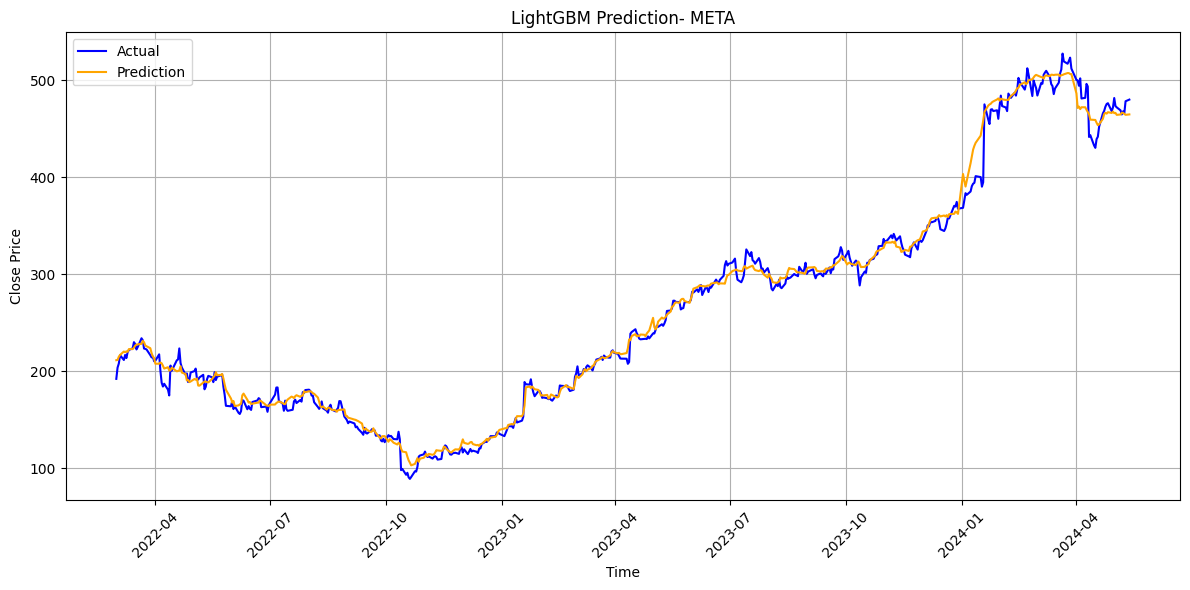

-----------------------------
Test
R2 Value Test:  -1.6915
MSE Test:       11488.5370
RMSE Test:      107.1846
MAE Test:       91.0470
MAPE:           0.1504
-----------------------------


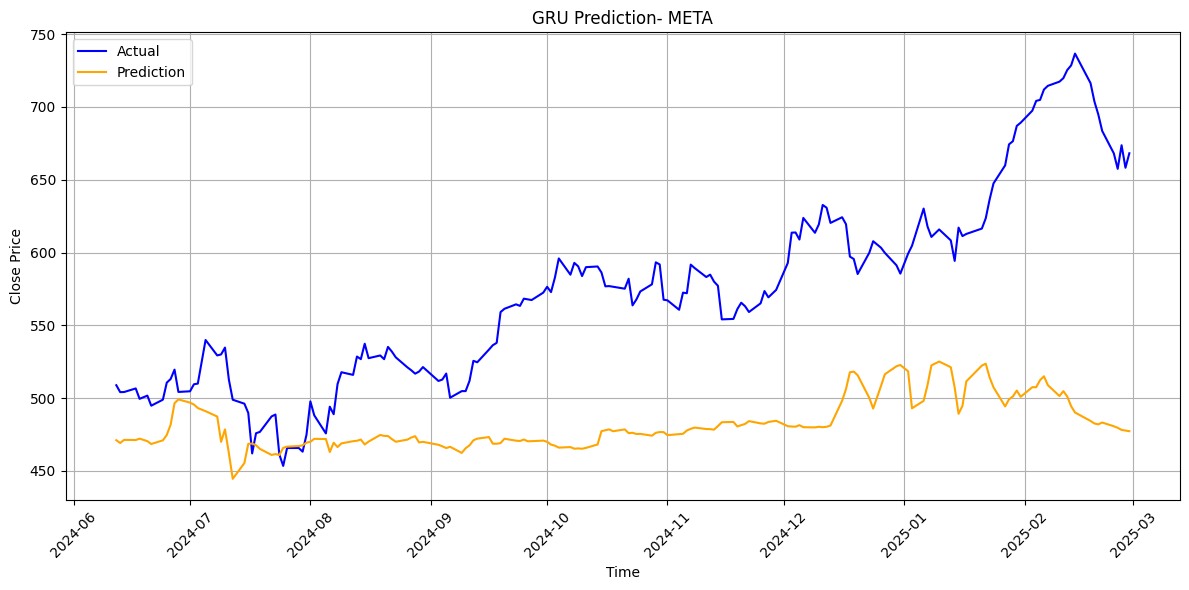

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a518c32340>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  508.84  471.076447
 575 2024-06-13  504.10  469.149323
 576 2024-06-14  504.16  471.280060
 577 2024-06-17  506.63  471.198822
 578 2024-06-18  499.49  472.143738
 ..         ...     ...         ...
 748 2025-02-24  668.13  480.653351
 749 2025-02-25  657.50  479.579407
 750 2025-02-26  673.70  478.155731
 751 2025-02-27  658.24  477.704315
 752 2025-02-28  668.20  477.249298
 
 [179 rows x 3 columns])

In [120]:
model_GRU(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9770
MSE Train:       7.6185
RMSE Train:      2.7602
MAE Train:       2.1506
MAPE Train:      0.0131
-----------------------------


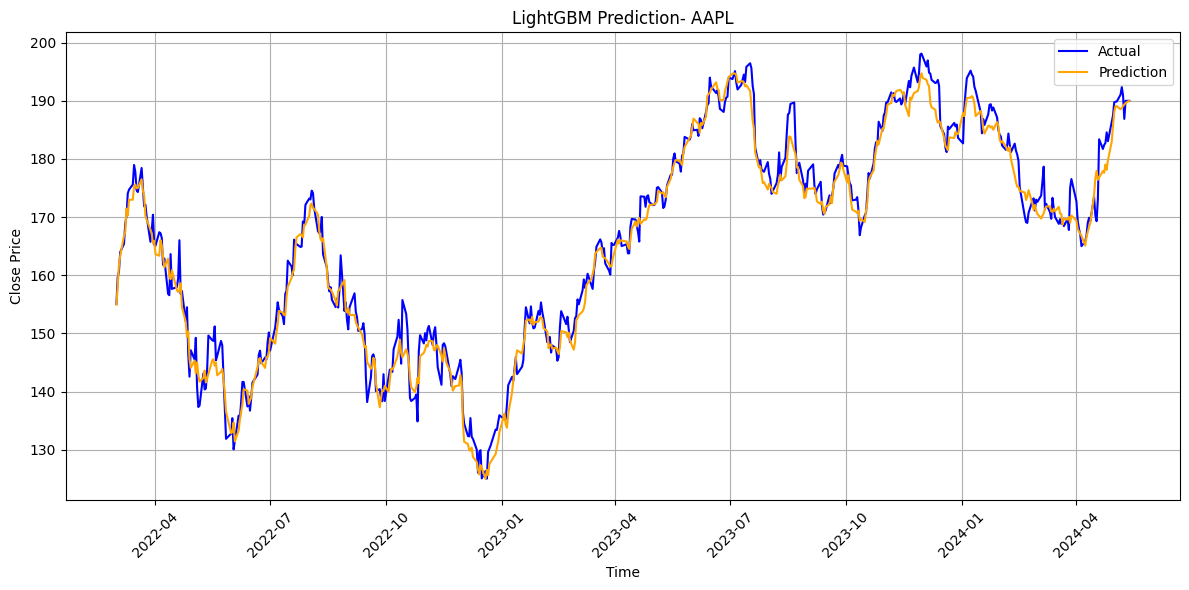

-----------------------------
Test
R2 Value Test:  -11.3568
MSE Test:       1511.2748
RMSE Test:      38.8751
MAE Test:       38.0762
MAPE:           0.1647
-----------------------------


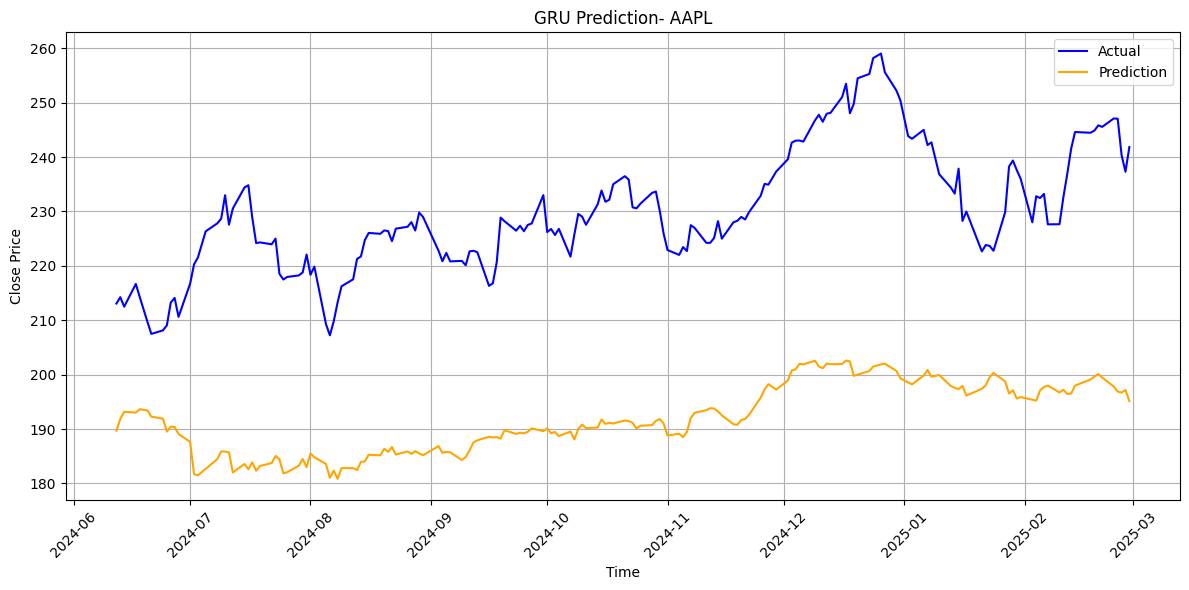

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a491d1bce0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  189.720520
 575 2024-06-13  214.24  191.851501
 576 2024-06-14  212.49  193.181808
 577 2024-06-17  216.67  193.021164
 578 2024-06-18  214.29  193.644150
 ..         ...     ...         ...
 748 2025-02-24  247.10  197.792557
 749 2025-02-25  247.04  196.880447
 750 2025-02-26  240.36  196.705826
 751 2025-02-27  237.30  197.168167
 752 2025-02-28  241.84  195.143524
 
 [179 rows x 3 columns])

In [121]:
model_GRU(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9871
MSE Train:       46.8650
RMSE Train:      6.8458
MAE Train:       5.4767
MAPE Train:      0.0185
-----------------------------


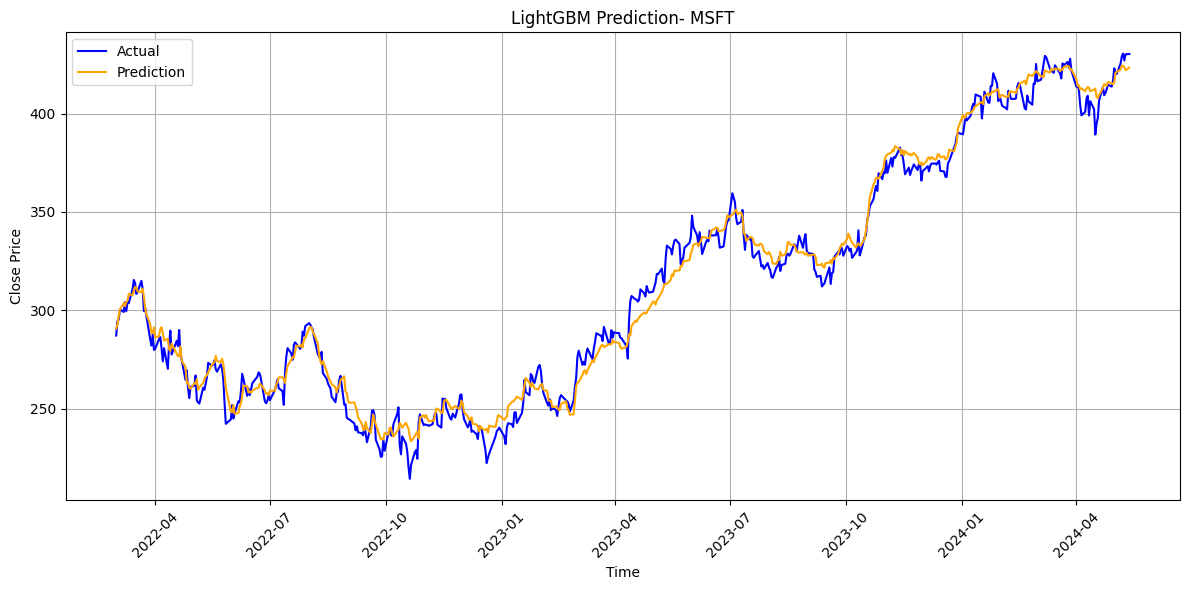

-----------------------------
Test
R2 Value Test:  -0.6088
MSE Test:       407.9749
RMSE Test:      20.1984
MAE Test:       17.7930
MAPE:           0.0421
-----------------------------


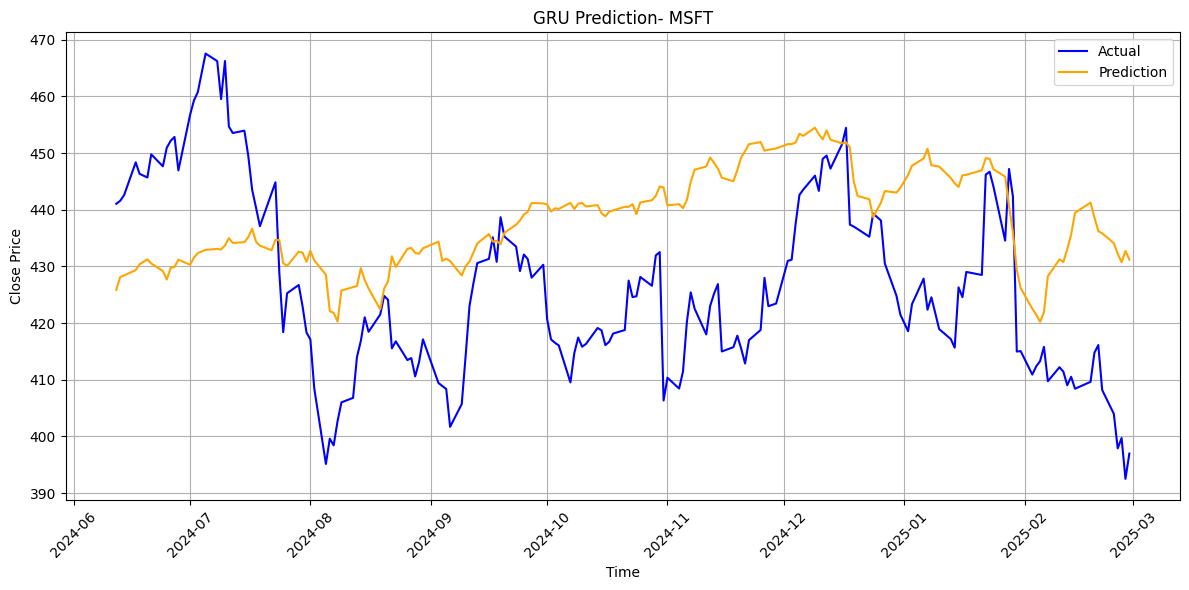

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a490966980>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  425.878387
 575 2024-06-13  441.58  428.143280
 576 2024-06-14  442.57  428.413483
 577 2024-06-17  448.37  429.363892
 578 2024-06-18  446.34  430.386902
 ..         ...     ...         ...
 748 2025-02-24  404.00  434.105255
 749 2025-02-25  397.90  432.238373
 750 2025-02-26  399.73  430.743103
 751 2025-02-27  392.53  432.727875
 752 2025-02-28  396.99  431.209595
 
 [179 rows x 3 columns])

In [122]:
model_GRU(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 32,
    epochs = 200,
    optimizer = 'RMSprop',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9937
MSE Train:       3.5812
RMSE Train:      1.8924
MAE Train:       1.4051
MAPE Train:      0.0444
-----------------------------


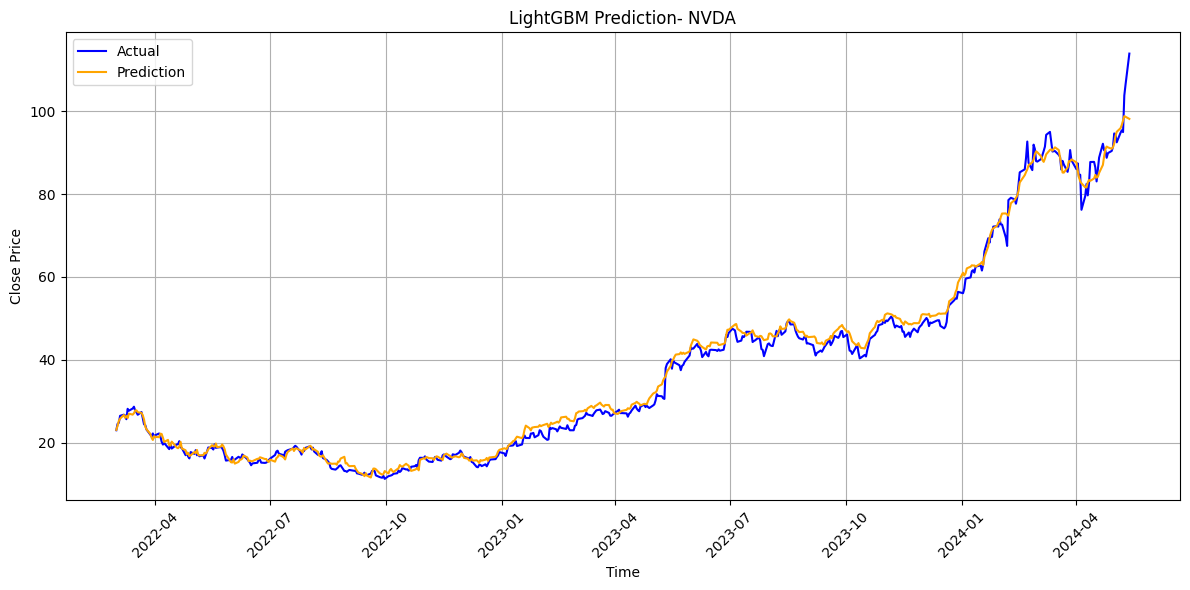

-----------------------------
Test
R2 Value Test:  -0.4218
MSE Test:       189.4219
RMSE Test:      13.7631
MAE Test:       11.4544
MAPE:           0.0874
-----------------------------


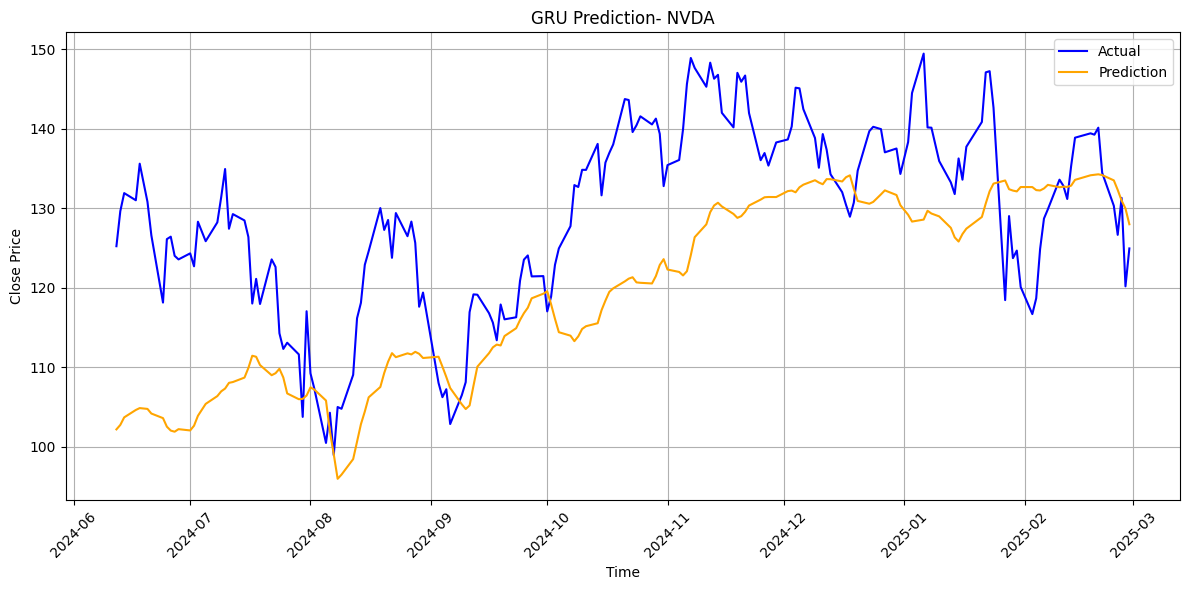

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a4798edf80>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  125.20  102.156494
 575 2024-06-13  129.61  102.717560
 576 2024-06-14  131.88  103.669624
 577 2024-06-17  130.98  104.601257
 578 2024-06-18  135.58  104.835693
 ..         ...     ...         ...
 748 2025-02-24  130.28  133.481949
 749 2025-02-25  126.63  132.282120
 750 2025-02-26  131.28  130.950119
 751 2025-02-27  120.15  129.941696
 752 2025-02-28  124.92  127.961151
 
 [179 rows x 3 columns])

In [123]:
model_GRU(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 16,
    epochs = 150,
    optimizer = 'Nadam',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9540
MSE Train:       19.8766
RMSE Train:      4.4583
MAE Train:       3.4569
MAPE Train:      0.0293
-----------------------------


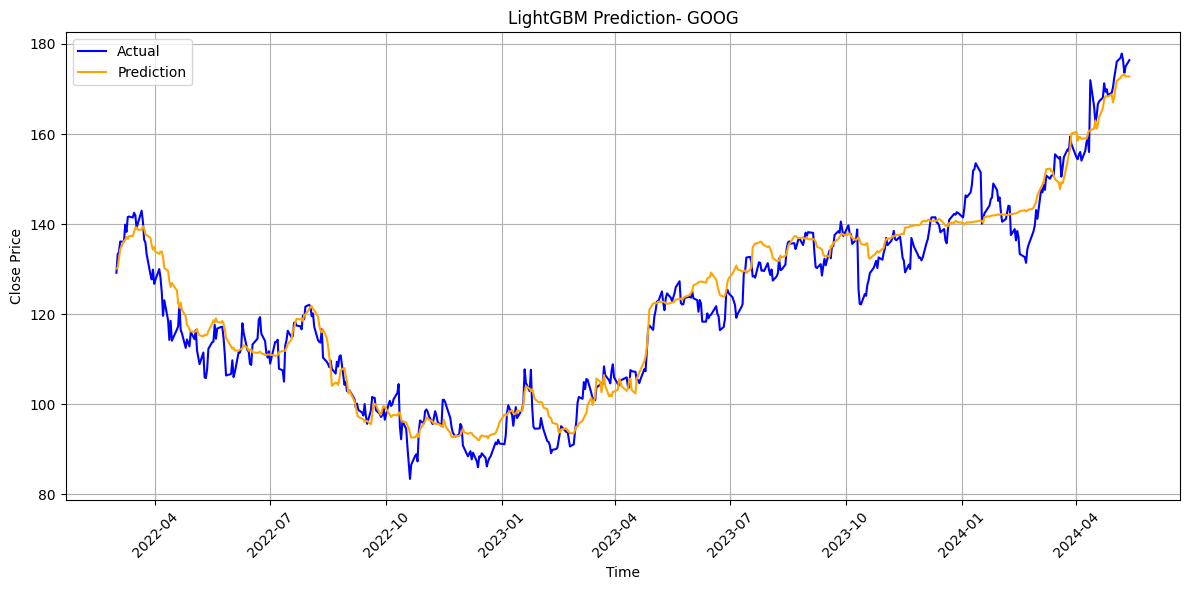

-----------------------------
Test
R2 Value Test:  0.0137
MSE Test:       168.9519
RMSE Test:      12.9981
MAE Test:       11.3121
MAPE:           0.0642
-----------------------------


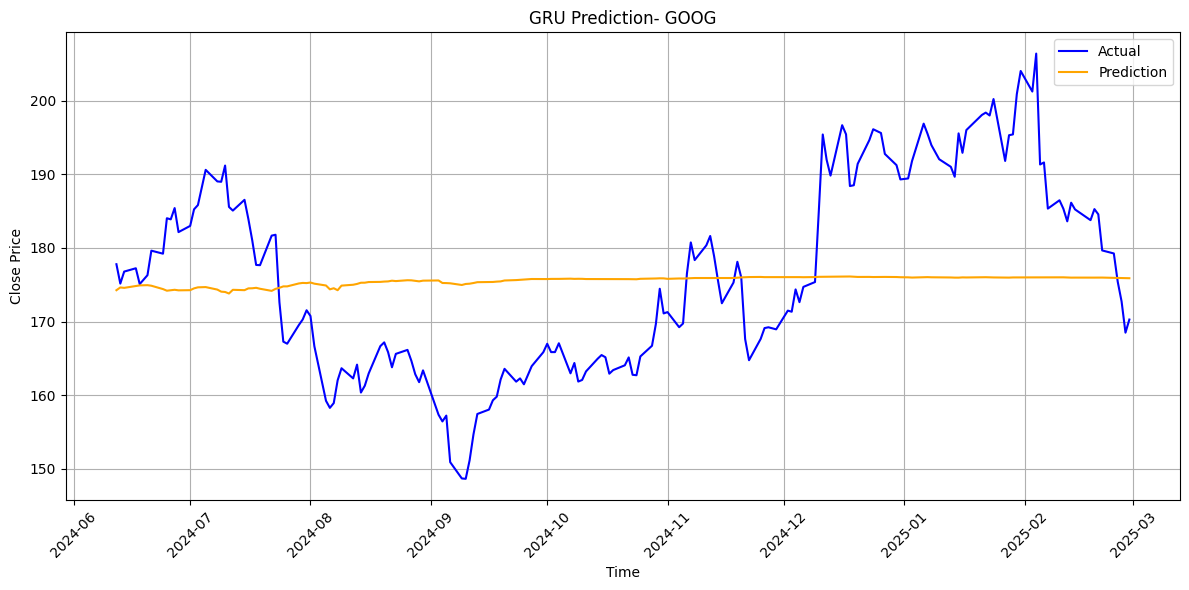

(KerasRegressor(
 	model=<function model_GRU.<locals>.create_model at 0x79a477b1a7a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=150
 ),
           date  actual  prediction
 574 2024-06-12  177.79  174.263016
 575 2024-06-13  175.16  174.634079
 576 2024-06-14  176.79  174.579865
 577 2024-06-17  177.24  174.835007
 578 2024-06-18  175.09  174.914749
 ..         ...     ...         ...
 748 2025-02-24  179.25  175.944473
 749 2025-02-25  175.42  175.923553
 750 2025-02-26  172.73  175.908508
 751 2025-02-27  168.50  175.904617
 752 2025-02-28  170.28  175.888809
 
 [179 rows x 3 columns])

In [124]:
model_GRU(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 32,
    epochs = 150,
    optimizer = 'Adam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')

#LSTM

In [125]:
def model_LSTM(X_train, y_train, X_test, y_test, batch_size, epochs,
                   optimizer, date_test, date_train, label_name='Dataset'):
    def create_model():
        model = Sequential()
        model.add(LSTM(256, input_shape=(look_back, X_train.shape[2])))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(1, activation='linear'))
        model.compile(loss='mse', optimizer=optimizer)
        return model

    params = {
        'batch_size': batch_size,
        'epochs': epochs,
    }
    model = KerasRegressor(model=create_model, verbose=0, **params)
    model.fit(X_train, y_train)

        # ===== Train Metrics =====
    y_train_pred = model.predict(X_train)
    print('-----------------------------')
    print('Train')
    print(f'R2 Value Train:  {r2_score(y_train, y_train_pred):.4f}')
    print(f'MSE Train:       {mean_squared_error(y_train, y_train_pred):.4f}')
    print(f'RMSE Train:      {np.sqrt(mean_squared_error(y_train, y_train_pred)):.4f}')
    print(f'MAE Train:       {mean_absolute_error(y_train, y_train_pred):.4f}')
    print(f'MAPE Train:      {mean_absolute_percentage_error(y_train, y_train_pred):.4f}')
    print('-----------------------------')
    plt.figure(figsize=(12, 6))
    plt.plot(date_train, y_train, label='Actual', color='blue')
    plt.plot(date_train, y_train_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LightGBM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # ===== Test Metrics =====
    y_pred = model.predict(X_test)
    print('-----------------------------')
    print('Test')
    print(f'R2 Value Test:  {r2_score(y_test, y_pred):.4f}')
    print(f'MSE Test:       {mean_squared_error(y_test, y_pred):.4f}')
    print(f'RMSE Test:      {root_mean_squared_error(y_test, y_pred):.4f}')
    print(f'MAE Test:       {mean_absolute_error(y_test, y_pred):.4f}')
    print(f'MAPE:           {mean_absolute_percentage_error(y_test, y_pred):.4f}')
    print('-----------------------------')

    plt.figure(figsize=(12, 6))
    plt.plot(date_test, y_test, label='Actual', color='blue')
    plt.plot(date_test, y_pred, label='Prediction', color='orange')
    plt.xticks(rotation=45)
    plt.title(f'LSTM Prediction- {label_name}')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    df_result = pd.DataFrame({
            'date': date_test,
            'actual': y_test,
            'prediction': y_pred
    })
    df_result.to_csv(os.path.join(path_Test,f'df_LSTM_{label_name}.csv'))
    return model, df_result

##META

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9900
MSE Train:       136.6761
RMSE Train:      11.6909
MAE Train:       8.2178
MAPE Train:      0.0353
-----------------------------


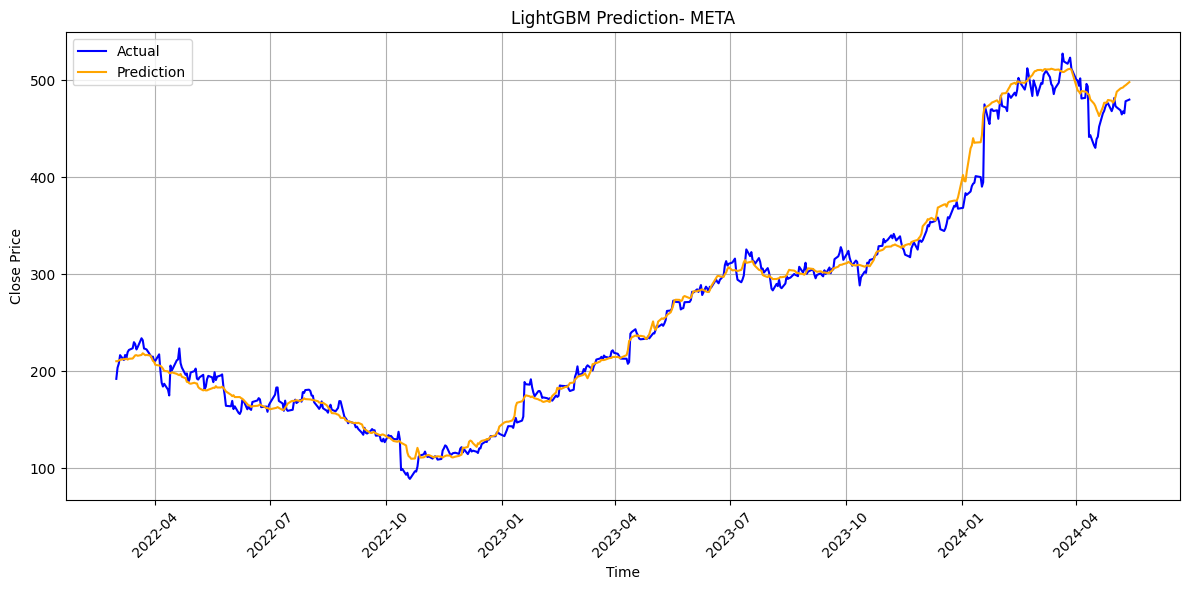

-----------------------------
Test
R2 Value Test:  -1.9872
MSE Test:       12750.5694
RMSE Test:      112.9184
MAE Test:       86.7062
MAPE:           0.1401
-----------------------------


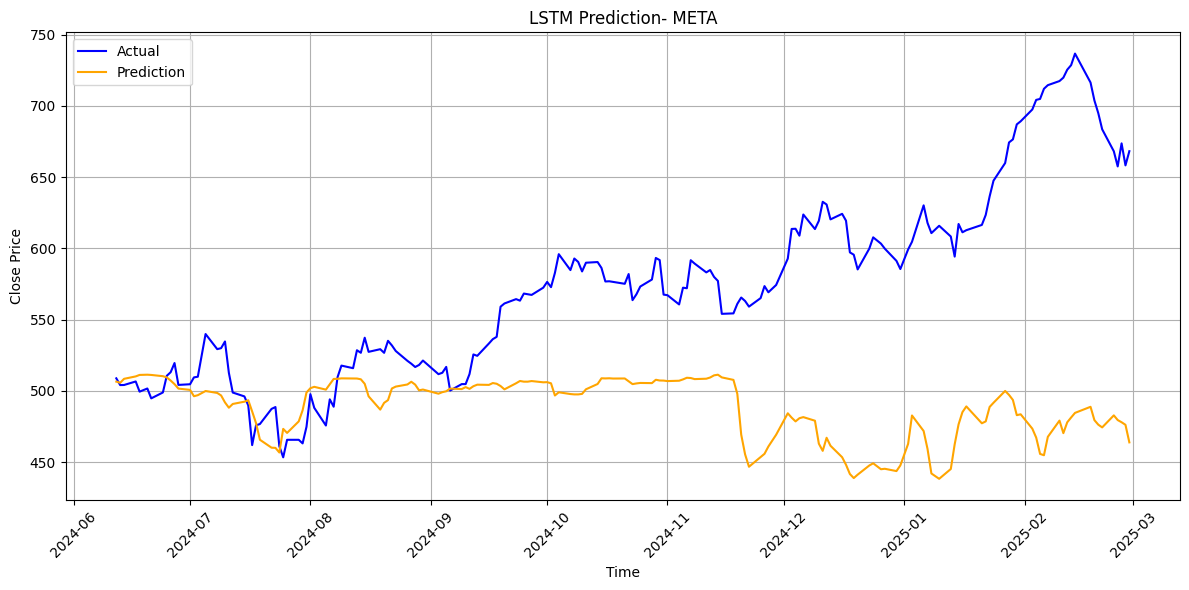

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a4775ed940>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  508.84  506.529114
 575 2024-06-13  504.10  505.718140
 576 2024-06-14  504.16  508.491150
 577 2024-06-17  506.63  510.188721
 578 2024-06-18  499.49  511.223389
 ..         ...     ...         ...
 748 2025-02-24  668.13  482.843140
 749 2025-02-25  657.50  479.563049
 750 2025-02-26  673.70  478.021179
 751 2025-02-27  658.24  476.224243
 752 2025-02-28  668.20  463.903809
 
 [179 rows x 3 columns])

In [126]:
model_LSTM(Xtrain_META1, ytrain_META1, XTest_META1, yTest_META1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Nadam',
    date_test=df_META['date'].iloc[train_size+10:],
    date_train=df_META['date'].iloc[:train_size-10],
    label_name='META')

##AAPL

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9639
MSE Train:       11.9747
RMSE Train:      3.4604
MAE Train:       2.7791
MAPE Train:      0.0167
-----------------------------


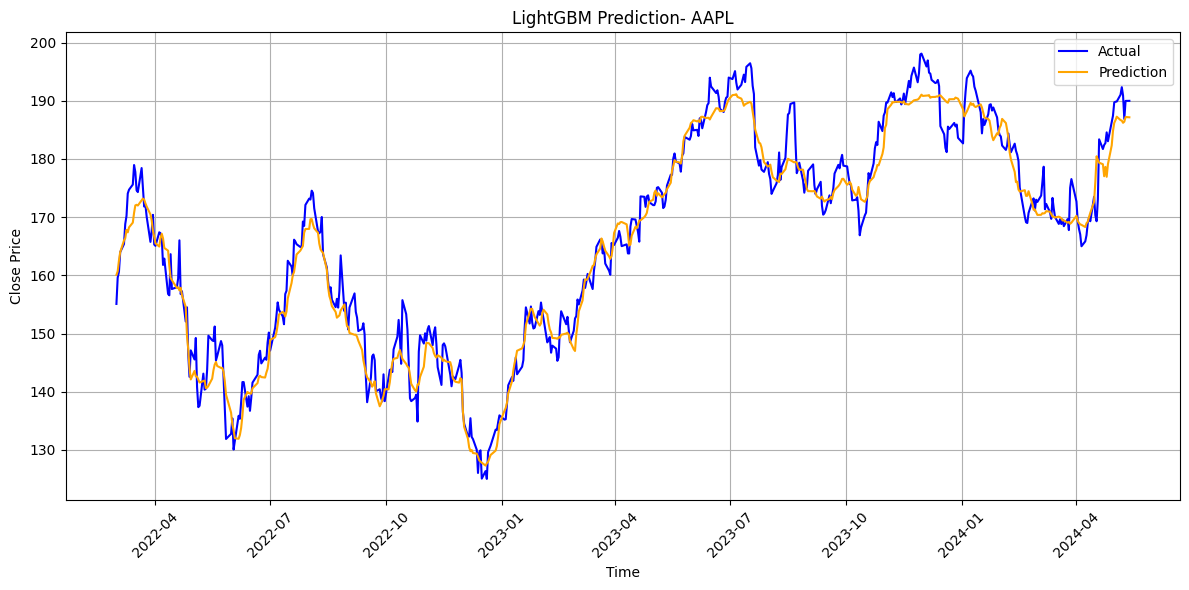

-----------------------------
Test
R2 Value Test:  -14.5414
MSE Test:       1900.7609
RMSE Test:      43.5977
MAE Test:       42.1564
MAPE:           0.1816
-----------------------------


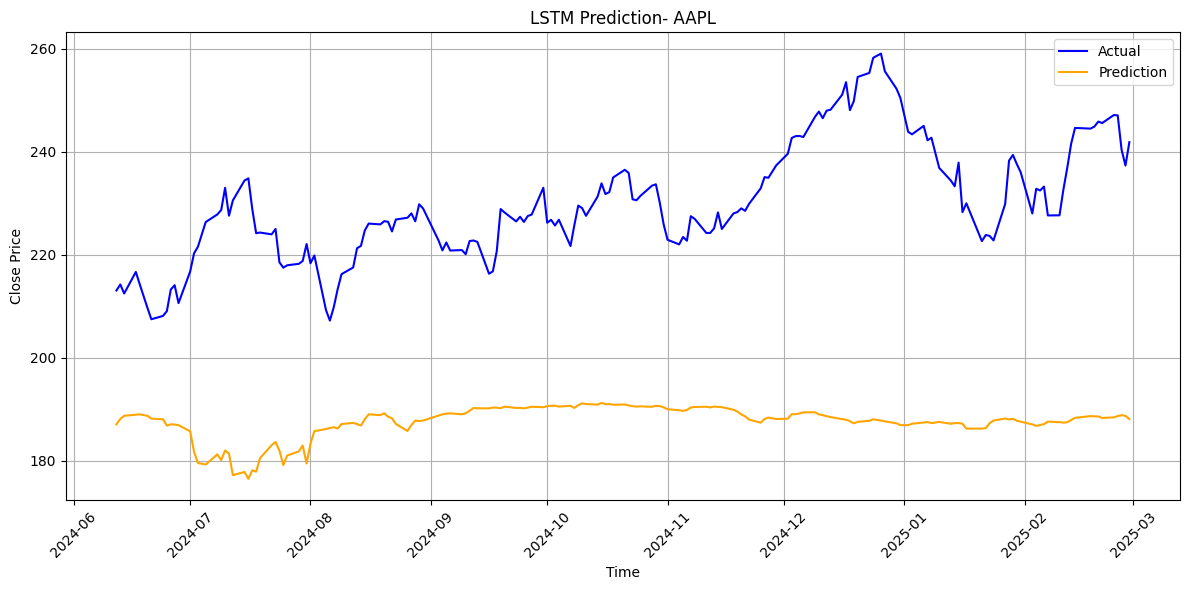

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a47a7b7600>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  213.07  187.104202
 575 2024-06-13  214.24  188.147919
 576 2024-06-14  212.49  188.766266
 577 2024-06-17  216.67  188.961548
 578 2024-06-18  214.29  189.044189
 ..         ...     ...         ...
 748 2025-02-24  247.10  188.457672
 749 2025-02-25  247.04  188.712952
 750 2025-02-26  240.36  188.892853
 751 2025-02-27  237.30  188.747711
 752 2025-02-28  241.84  188.140778
 
 [179 rows x 3 columns])

In [127]:
model_LSTM(Xtrain_AAPL1, ytrain_AAPL1, XTest_AAPL1, yTest_AAPL1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_AAPL['date'].iloc[train_size+10:],
    date_train=df_AAPL['date'].iloc[:train_size-10],
    label_name='AAPL')

##MSFT

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9897
MSE Train:       37.5308
RMSE Train:      6.1262
MAE Train:       4.7605
MAPE Train:      0.0160
-----------------------------


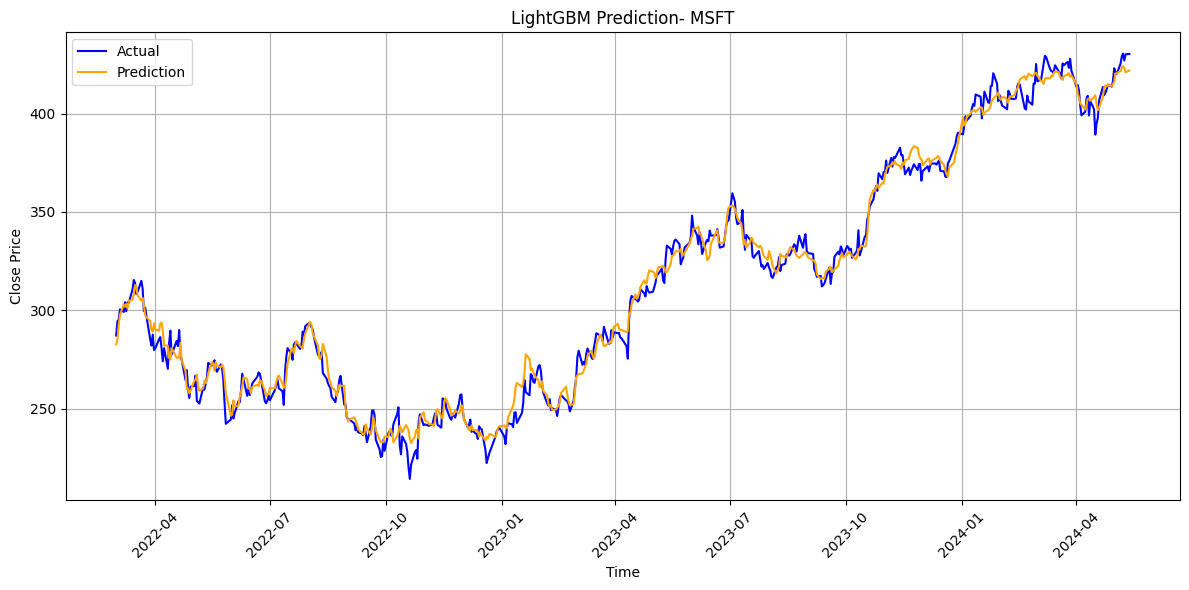

-----------------------------
Test
R2 Value Test:  -0.9925
MSE Test:       505.2814
RMSE Test:      22.4785
MAE Test:       19.2508
MAPE:           0.0457
-----------------------------


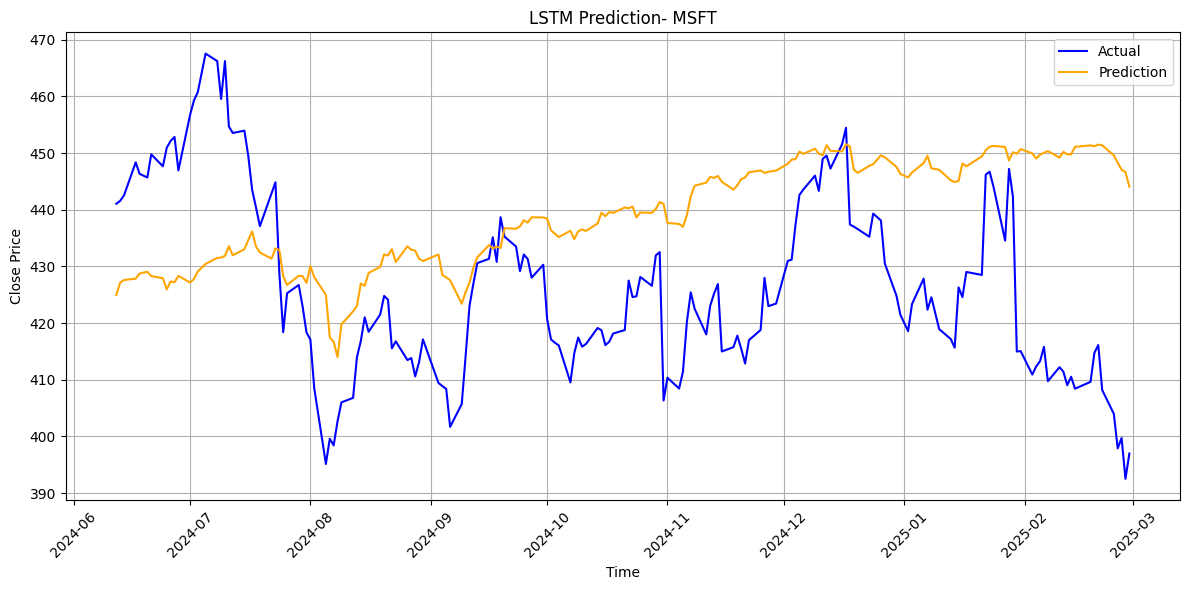

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a4816218a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  441.06  424.951996
 575 2024-06-13  441.58  427.156555
 576 2024-06-14  442.57  427.607361
 577 2024-06-17  448.37  427.854828
 578 2024-06-18  446.34  428.762421
 ..         ...     ...         ...
 748 2025-02-24  404.00  449.604980
 749 2025-02-25  397.90  448.303131
 750 2025-02-26  399.73  447.052368
 751 2025-02-27  392.53  446.667206
 752 2025-02-28  396.99  444.077911
 
 [179 rows x 3 columns])

In [128]:
model_LSTM(Xtrain_MSFT1, ytrain_MSFT1, XTest_MSFT1, yTest_MSFT1,
    batch_size = 16,
    epochs = 200,
    optimizer = 'Adam',
    date_test=df_MSFT['date'].iloc[train_size+10:],
    date_train=df_MSFT['date'].iloc[:train_size-10],
    label_name='MSFT')

##NVDA

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9941
MSE Train:       3.3401
RMSE Train:      1.8276
MAE Train:       1.2758
MAPE Train:      0.0390
-----------------------------


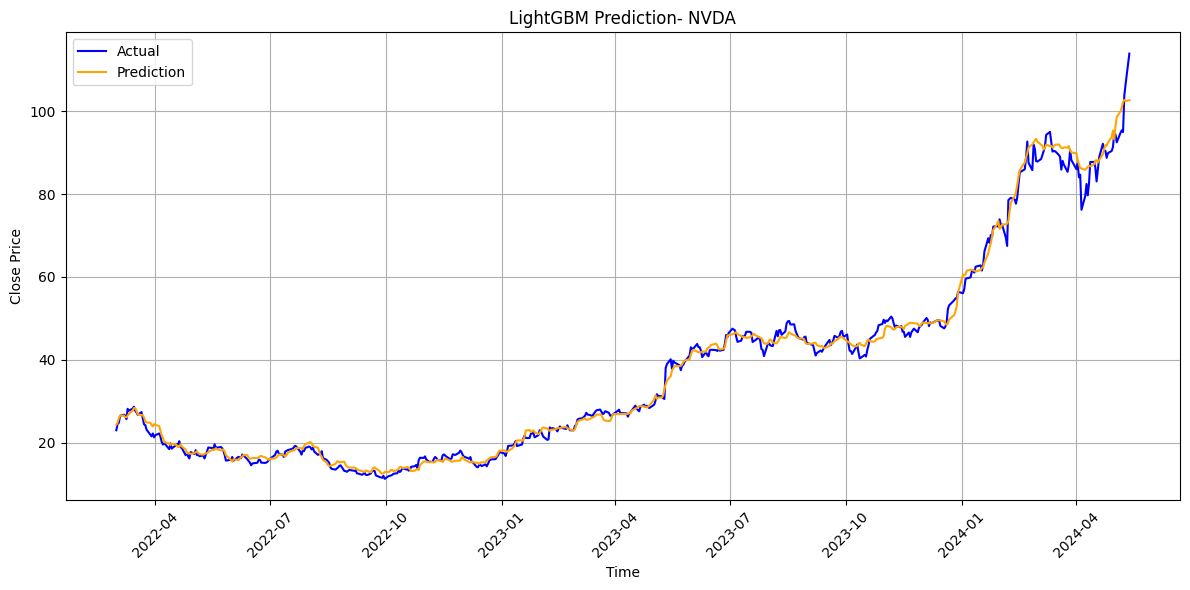

-----------------------------
Test
R2 Value Test:  -4.1270
MSE Test:       683.0483
RMSE Test:      26.1352
MAE Test:       22.6346
MAPE:           0.1712
-----------------------------


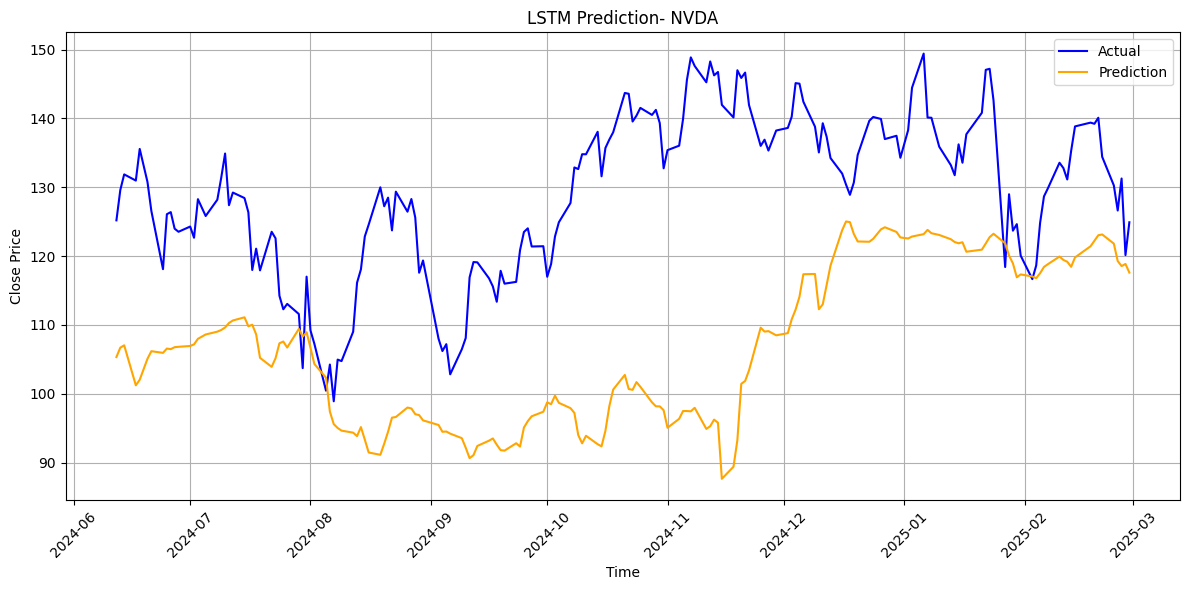

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a4732f5120>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=32
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=200
 ),
           date  actual  prediction
 574 2024-06-12  125.20  105.340988
 575 2024-06-13  129.61  106.704765
 576 2024-06-14  131.88  107.044113
 577 2024-06-17  130.98  101.231796
 578 2024-06-18  135.58  102.037727
 ..         ...     ...         ...
 748 2025-02-24  130.28  121.818459
 749 2025-02-25  126.63  119.289558
 750 2025-02-26  131.28  118.554893
 751 2025-02-27  120.15  118.865364
 752 2025-02-28  124.92  117.610733
 
 [179 rows x 3 columns])

In [129]:
model_LSTM(Xtrain_NVDA1, ytrain_NVDA1, XTest_NVDA1, yTest_NVDA1,
    batch_size = 32,
    epochs = 200,
    optimizer = 'AdamW',
    date_test=df_NVDA['date'].iloc[train_size+10:],
    date_train=df_NVDA['date'].iloc[:train_size-10],
    label_name='NVDA')

##GOOG

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


-----------------------------
Train
R2 Value Train:  0.9582
MSE Train:       18.0722
RMSE Train:      4.2511
MAE Train:       3.4215
MAPE Train:      0.0282
-----------------------------


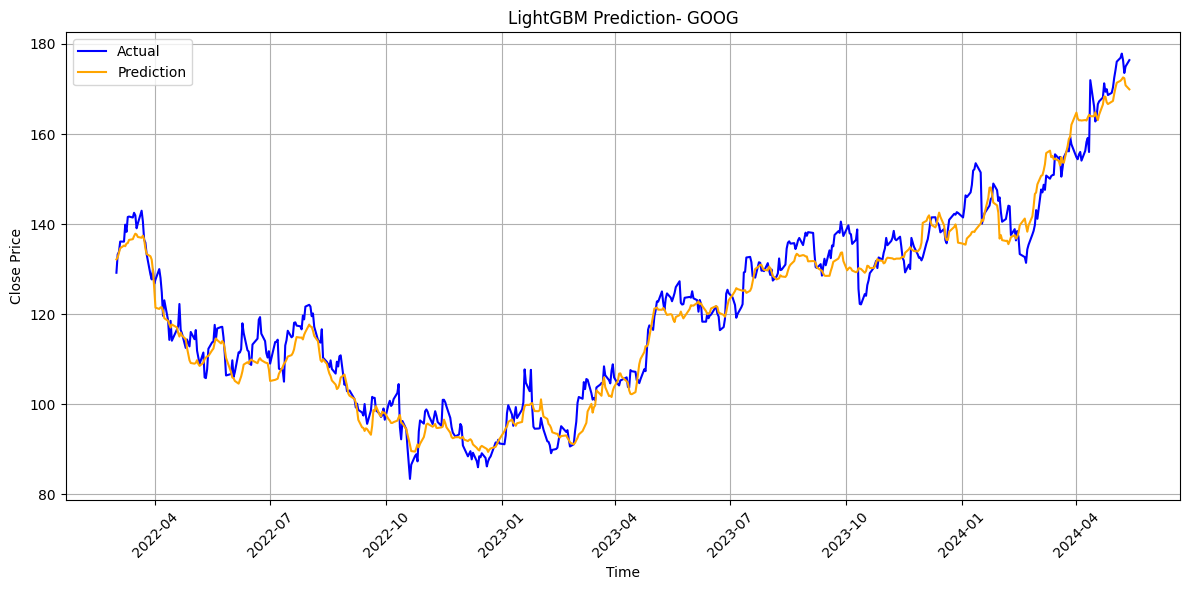

-----------------------------
Test
R2 Value Test:  -0.0274
MSE Test:       175.9945
RMSE Test:      13.2663
MAE Test:       11.6824
MAPE:           0.0686
-----------------------------


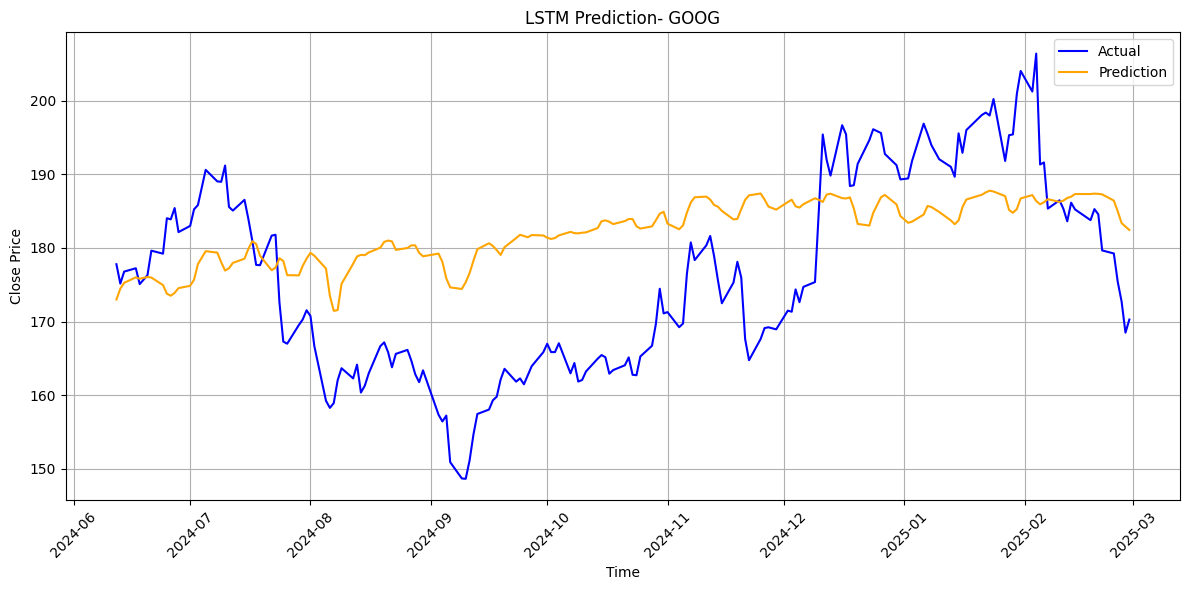

(KerasRegressor(
 	model=<function model_LSTM.<locals>.create_model at 0x79a473cdb1a0>
 	build_fn=None
 	warm_start=False
 	random_state=None
 	optimizer=rmsprop
 	loss=None
 	metrics=None
 	batch_size=16
 	validation_batch_size=None
 	verbose=0
 	callbacks=None
 	validation_split=0.0
 	shuffle=True
 	run_eagerly=False
 	epochs=100
 ),
           date  actual  prediction
 574 2024-06-12  177.79  172.997574
 575 2024-06-13  175.16  174.467590
 576 2024-06-14  176.79  175.266922
 577 2024-06-17  177.24  176.006653
 578 2024-06-18  175.09  175.812393
 ..         ...     ...         ...
 748 2025-02-24  179.25  186.420395
 749 2025-02-25  175.42  184.976212
 750 2025-02-26  172.73  183.376526
 751 2025-02-27  168.50  182.894379
 752 2025-02-28  170.28  182.440063
 
 [179 rows x 3 columns])

In [130]:
model_LSTM(Xtrain_GOOG1, ytrain_GOOG1, XTest_GOOG1, yTest_GOOG1,
    batch_size = 16,
    epochs = 100,
    optimizer = 'Adam',
    date_test=df_GOOG['date'].iloc[train_size+10:],
    date_train=df_GOOG['date'].iloc[:train_size-10],
    label_name='GOOG')